In [ ]:
# Configurando área
options(warn = -1)
options(repr.plot.width = 12, repr.plot.height = 7)

# Análise exploratória de dados socioeconômicos

## Introdução

### Sobre o conjunto de dados

Fonte: os dados fora disponibilizados por Laurel Hanscon, e podem ser encontrados [aqui](https://data.world/laurel/world-happiness-report-data).

Resumo:

O primeiro Relatório Mundial de Felicidade foi publicado em abril de 2012, em apoio à Reunião de Alto Nível da ONU sobre felicidade e bem-estar. Desde então, o mundo percorreu um longo caminho. Cada vez mais, a felicidade é considerada a medida adequada do progresso social e o objetivo da política pública. Em junho de 2016, a OCDE se comprometeu a “redefinir a narrativa de crescimento para colocar o bem-estar das pessoas no centro dos esforços dos governos”. Em fevereiro de 2017, os Emirados Árabes Unidos realizaram uma reunião de dia inteiro sobre Felicidade Mundial, como parte da Cúpula Mundial do Governo. Agora no Dia Mundial da Felicidade, 20 de março, lançamos o Relatório Mundial da Felicidade 2017, mais uma vez nas Nações Unidas, novamente publicado pela Rede de Soluções para o Desenvolvimento Sustentável, e agora apoiado por uma generosa doação de três anos da Fundação Ernesto Illy. Alguns destaques são os seguintes.[Fonte](https://data.world/laurel/world-happiness-report-data)

### Motivação - responder às seguintes questões de negócio:

**Pergunta 1**:O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer?Qual a correlação entre essas duas variáveis?

**Pergunta 2**: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?

**Pergunta 3**: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral?Qual a correlação entre essas duas variáveis?

**Pergunta 4**: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?

**Pergunta 5**: Pessoas generosas são mais felizes?

### Dicionário de dados

|Label           |         Descrição     |      Classe        |
|----------------|-----------------------|------------------|
|Country.name|Nome do pais| string|
|year|Ano|numeric|
|Life.Ladder|índice de felicidade|numeric|
|Log.GDP.per.capta|      PIB *per capta* ($)|      double|
|Social.support|    Programas sociais|        numeric    |
|Healthy.life.expectancy.at.birth|   Expectativa de vida (ao nascer)| numeric |
|Freedom.to.make.life.choices | Índice de liberdade | numeric |
|Generosity | Doou dinheiro | numeric|
|Perceptions_of_corruption | Corrupção | numeric|
|Positive_affect|  Felicidade, riso, diversão | numeric|
|Negative_affect | Preocupação, tristeza, raiva | numeric|


## Projeto

### Bibliotecas

Instalando

In [ ]:
install.packages("moments")
install.packages("visdat")
install.packages("lattice")
install.packages("naniar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘gridExtra’, ‘plyr’, ‘norm’, ‘viridis’, ‘UpSetR’




Carregando

In [ ]:
library(dplyr)
library(ggplot2)
library(moments)
library(visdat)
library(lattice)
library(naniar)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Funções

- Proporção de valores missing por variáveis

In [ ]:
missing_prop <- function(x = NULL, individual = TRUE){

  if (!is.logical(individual)) {

    stop("Informe um booleano no argumento 'individual'")

    } else  {

    if (individual) {

      if (is.null(x)) {

        stop("Informe os labels das variáveis a seres pesquisadas.")

        } else {

          if (any(is.na(dados_[, x]))) {

            data_1 = data.frame(rotulo = c("not_missing", "missing"),
                                valor = c(table(is.na(dados_[, x]))[1],
                                          table(is.na(dados_[, x]))[2]))

            data_1$fraction = data_1$valor / sum(data_1$valor)

            data_1$ymax = cumsum(data_1$fraction)

            data_1$ymin = c(0, head(data_1$ymax, n=-1))

            data_1$labelposition = (data_1$ymax + data_1$ymin) / 2

            data_1$label = paste0(data_1$rotulo, "\n Instâncias: ", data_1$valor)

            ggplot(data_1, mapping = aes(ymax = ymax, ymin = ymin,
                                         xmax = 4, xmin = 3, fill=rotulo)) +
              geom_rect() +

              geom_text(x = 2, aes(y = labelposition, label = label, color = rotulo), size = 6) +

              coord_polar(theta = 'y') +

              xlim(c(-1,4)) +

              theme_void() +

              theme(legend.position = "right", legend.text = element_text(size = 12),
                    legend.title = element_text(size = 14)) +

              theme(plot.title = element_text(size= 16)) +

              ggtitle(paste("Proporção de dados missing vs not_missing na variável \n", as.character(x)))

            }

        }} else if (!individual) {


          if (any(is.na(dados_))) {

            data_2 = data.frame(rotulo = c("not_missing", "missing"),
                                valor = c(table(is.na(dados_))[1],
                                          table(is.na(dados_))[2]))

            data_2$fraction = data_2$valor / sum(data_2$valor)

            data_2$ymax = cumsum(data_2$fraction)

            data_2$ymin = c(0, head(data_2$ymax, n=-1))

            data_2$labelposition = (data_2$ymax + data_2$ymin) / 2

            data_2$label = paste0(data_2$rotulo, "\n Instâncias: ", data_2$valor)

            ggplot(data_2, mapping = aes(ymax = ymax, ymin = ymin,
                                         xmax = 4, xmin = 3, fill=rotulo)) +
              geom_rect() +

              geom_text(x = 2, aes(y = labelposition, label = label, color = rotulo), size = 6) +

              coord_polar(theta = 'y') +

              xlim(c(-1,4)) +

              theme_void() +

              theme(legend.position = "right", legend.text = element_text(size = 12),
                    legend.title = element_text(size = 14)) +

              theme(plot.title = element_text(size= 16)) +

              ggtitle("Proporção de dados missing vs not_missing na base da dados")
          }

      }
    }
  }


- Calcula a moda

In [ ]:
moda <- function(x) {

  tabela <- table(x)

  max(names(tabela[tabela == max(tabela)]))


}


- Resumo estatístico das variáveis numéricas

In [ ]:
statistic_num <- function(x){

  data <- x %>% select(where(is.numeric))

  data.frame(media = sapply(data, mean),

             mediana = sapply(data, median),

             moda = sapply(data, moda),

             range = sapply(data, function(col)paste(min(col), max(col))),

             amplitude = sapply(data, function(col)diff(range(col))),

             valores_uni = sapply(data, function(col)length(unique(col)))
             )

}


- Função para calcular a dispersão dos dados numéricos

In [ ]:
dispersion_num <- function(x){


  data  = x %>% select(where(is.numeric))

  data.frame(desvio_padrao = sapply(data, sd),
             coef.variacao = sapply(data, function(col)sd(col)/mean(col)),
             iqr = sapply(data, IQR)
             )

}

- Plotar Histograma

In [ ]:
histograma <- function(label){

  dados <- dados_[, label]

  grafico <- hist(dados, probability = T,
                  main = label,
                  xlab = "",
                  ylab = "")
  lines(density(dados))


  #fazer uma distribuicao normal
  media <- mean(dados)
  desvio = sd(dados)
  x <- seq(min(dados), max(dados), length.out = length(grafico$breaks))
  curve(dnorm(x, mean = media, sd= desvio), add = T, col = "red", lwd = 2)
  legend("topright", legend = c("Densidade", "Distribuição normal"),
         col = c("black", "red"), lty = c(1,1), lwd = c(1,2))
  legend(x = 'topleft', legend = c(paste("simetria = ", round(skewness(dados), 5)),
                                   paste("curtose = ", round(kurtosis(dados), 5))))



}


- Plotar boxplot

In [ ]:
boxplot_grapf <- function(x){


  labels <- x %>% select(where(is.numeric)) %>% colnames()

  par(mfrow = c(3,3))

  lapply(labels, function(col)boxplot(x[, col],
                                      main = col))
  par(mfrow = c(1,1))

}

- Plotar boxplot 2

In [ ]:
plot_box <- function(coluna){
  coluna = sym(coluna)

  ggplot(data = dados_, mapping = aes(y=!!coluna, x = class, color = class)) +

  geom_boxplot() +

  labs(title = paste("Boxplot da variável ", coluna, " por classe."))
}


- Plotar Matriz de Correlação

In [ ]:
plot_cor <- function(x, label){

  diag(x) <- 0.0
  levelplot(x,
            main = paste("Correlação com coef. de ", as.character(label)),
            xlab = "",
            ylab = "",
            scales = list(x = list(rot = 90)))


}

- Transformação dos dados

In [ ]:
new_data <- function(){

  data = data.frame(nomePais = unique(dados_$nomePais))

  labels <- dados_ %>% select(where(is.numeric)) %>% colnames()

  for (label in labels) {

    group = dados_ %>%

      group_by(nomePais) %>%

      summarise(across(all_of(label), mean))

    data = merge(data, group)

  }

  return(data)

}


- Gráfico de dispersão

In [ ]:
scatterPlot <- function(xAxis, yAxis){


  ggplot(data = dados_, mapping = aes_string(x = xAxis, y = yAxis)) +

    geom_point() +

    ggtitle("Gráfico de dispersão") +

    ylab(yAxis) +

    xlab(xAxis)


}

### Carga e visualização dos dados

In [ ]:
dados_ = read.csv("dataset.csv")

In [ ]:
tail(dados_)

,Country.name,year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,Positive.affect,Negative.affect
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1944,Zimbabwe,2015,3.703,7.992,0.736,53.8,0.667,-0.123,0.810,0.715,0.179
1945,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
1946,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1947,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1948,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235
1949,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346


### DataWrangling (pré-processamento e tratamento)

Pré-processamento

Os dados estão em formato tabular, e, até este momento, as informações parecem corresponder à respectiva variável. Portanto, não será necessário pré-processar a informação para acessá-la.

Tratamento

Conhecendo metadados

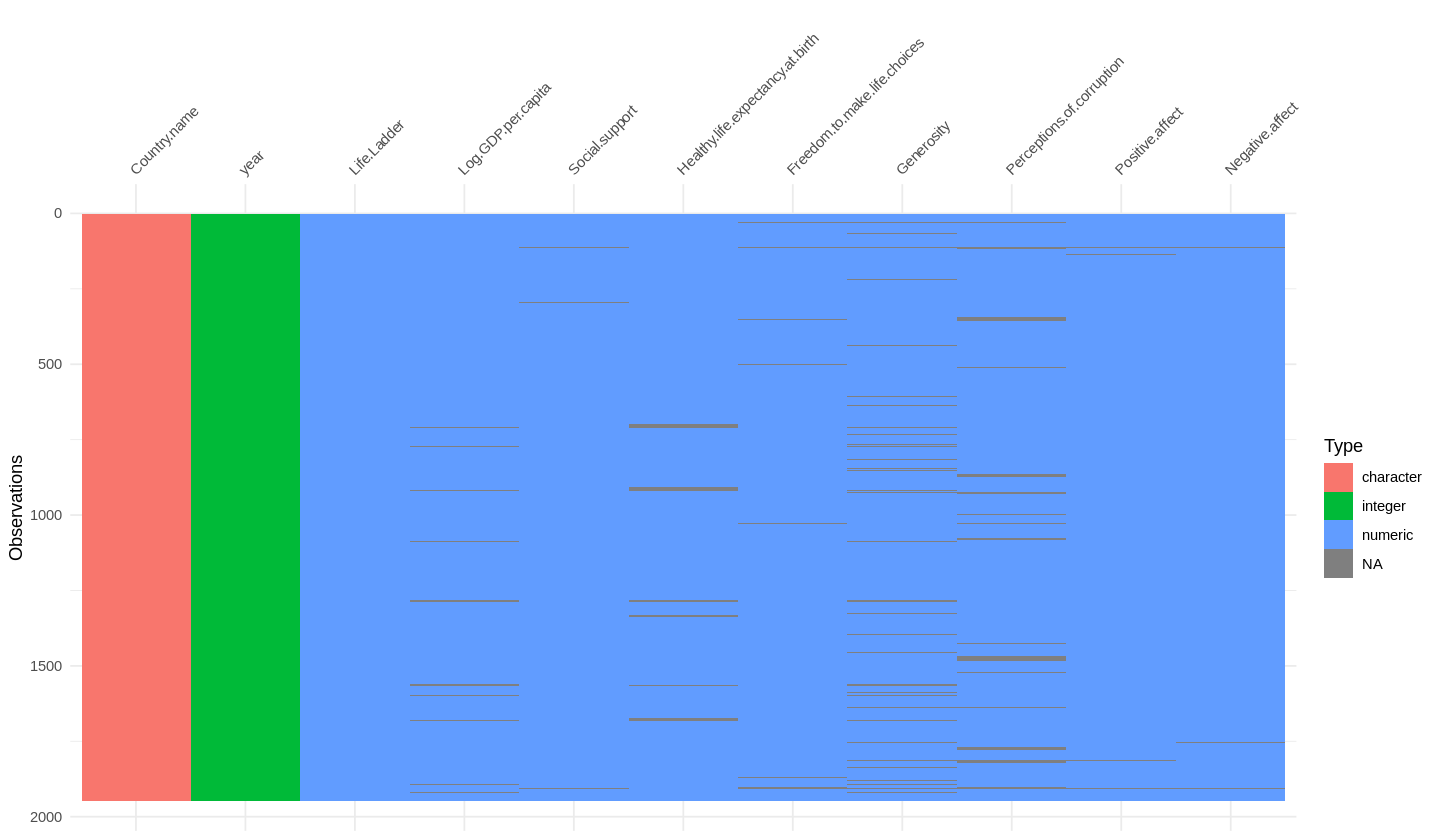

In [ ]:
vis_dat(dados_)

In [ ]:
str(dados_)

'data.frame':	1949 obs. of  11 variables:
 $ Country.name                    : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ year                            : int  2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 ...
 $ Life.Ladder                     : num  3.72 4.4 4.76 3.83 3.78 ...
 $ Log.GDP.per.capita              : num  7.37 7.54 7.65 7.62 7.71 ...
 $ Social.support                  : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ Healthy.life.expectancy.at.birth: num  50.8 51.2 51.6 51.9 52.2 ...
 $ Freedom.to.make.life.choices    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ Generosity                      : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ Perceptions.of.corruption       : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ Positive.affect                 : num  0.518 0.584 0.618 0.611 0.71 0.621 0.532 0.554 0.565 0.496 ...
 $ Negative.affect     

Objeto da classe "data.frame', com 1949 instâncias e 11 variáveis.

- Transformar "Country.name" em fator;
- Transformar "year" em character.

Editando metadados

In [ ]:
dados_$Country.name = as.factor(dados_$Country.name)

dados_$year = as.character(dados_$year)


Verificando

In [ ]:
str(dados_)

'data.frame':	1949 obs. of  11 variables:
 $ Country.name                    : Factor w/ 166 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year                            : chr  "2008" "2009" "2010" "2011" ...
 $ Life.Ladder                     : num  3.72 4.4 4.76 3.83 3.78 ...
 $ Log.GDP.per.capita              : num  7.37 7.54 7.65 7.62 7.71 ...
 $ Social.support                  : num  0.451 0.552 0.539 0.521 0.521 0.484 0.526 0.529 0.559 0.491 ...
 $ Healthy.life.expectancy.at.birth: num  50.8 51.2 51.6 51.9 52.2 ...
 $ Freedom.to.make.life.choices    : num  0.718 0.679 0.6 0.496 0.531 0.578 0.509 0.389 0.523 0.427 ...
 $ Generosity                      : num  0.168 0.19 0.121 0.162 0.236 0.061 0.104 0.08 0.042 -0.121 ...
 $ Perceptions.of.corruption       : num  0.882 0.85 0.707 0.731 0.776 0.823 0.871 0.881 0.793 0.954 ...
 $ Positive.affect                 : num  0.518 0.584 0.618 0.611 0.71 0.621 0.532 0.554 0.565 0.496 ...
 $ Negative.affect                 : num  0.258

Vamos alterar o nome dos labels, para facilitar a compreensão e uso das variáveis.

In [ ]:
colnames(dados_) = c("nomePais", "ano", "nivelVida", "PIBPerCapta",
"supSocial", "expecVida", "indicLiberdade", "indicGenerosidade",
"indicCorrupcao", "emocoesPositivas", "emocoesNegativas")

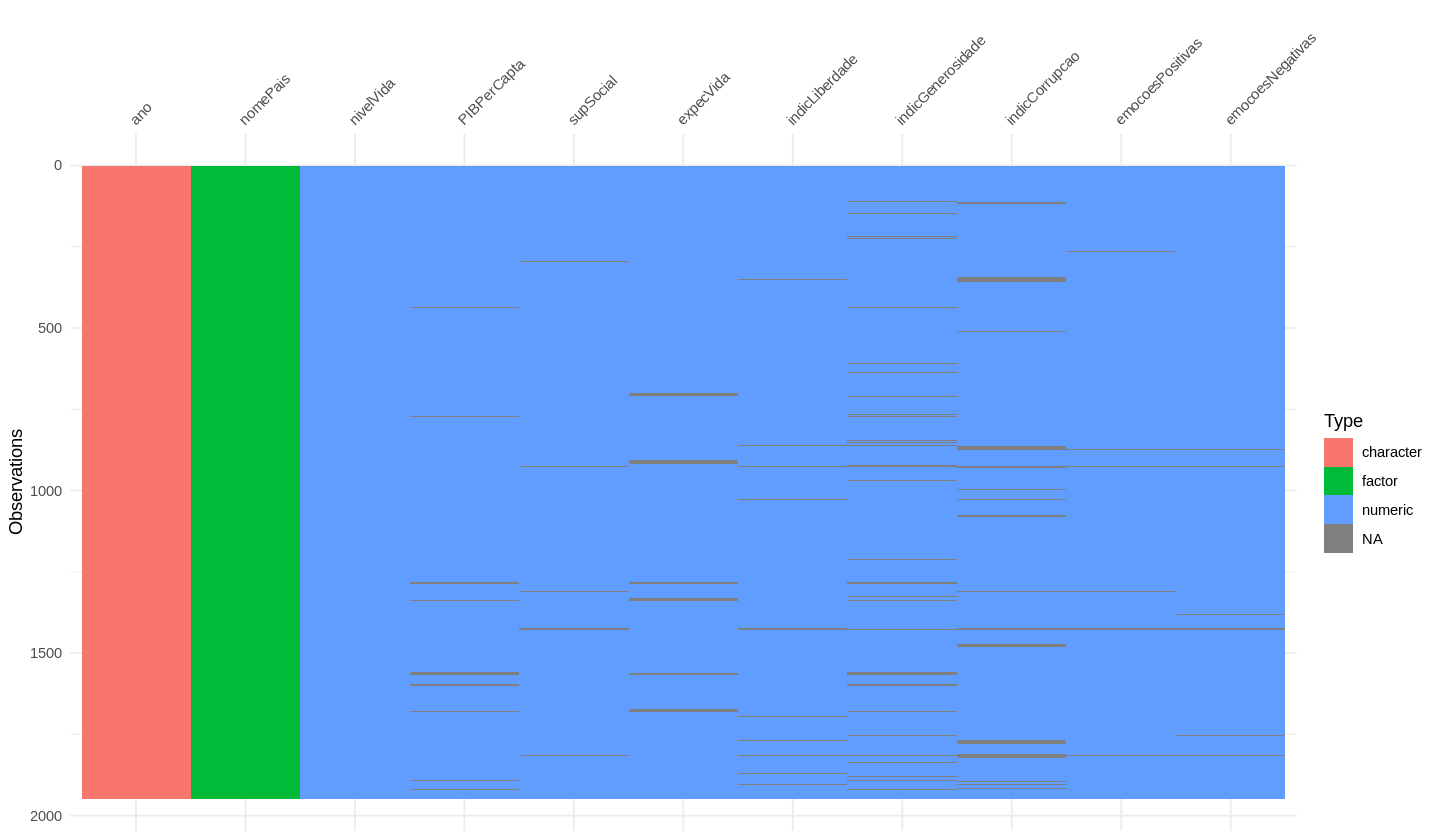

In [ ]:
vis_dat(dados_)

### DataMunging (manipulação e transformação)

Manipulação

Verificando na's

In [ ]:
any(is.na(dados_))

[1] TRUE

Conhecendo na's nas variáveis

In [ ]:
as.data.frame(colSums(is.na(dados_)))

,colSums(is.na(dados_))
,<dbl>
nomePais,0
ano,0
nivelVida,0
PIBPerCapta,36
supSocial,13
expecVida,55
indicLiberdade,32
indicGenerosidade,89
indicCorrupcao,110


Visualizando distribuição de na's

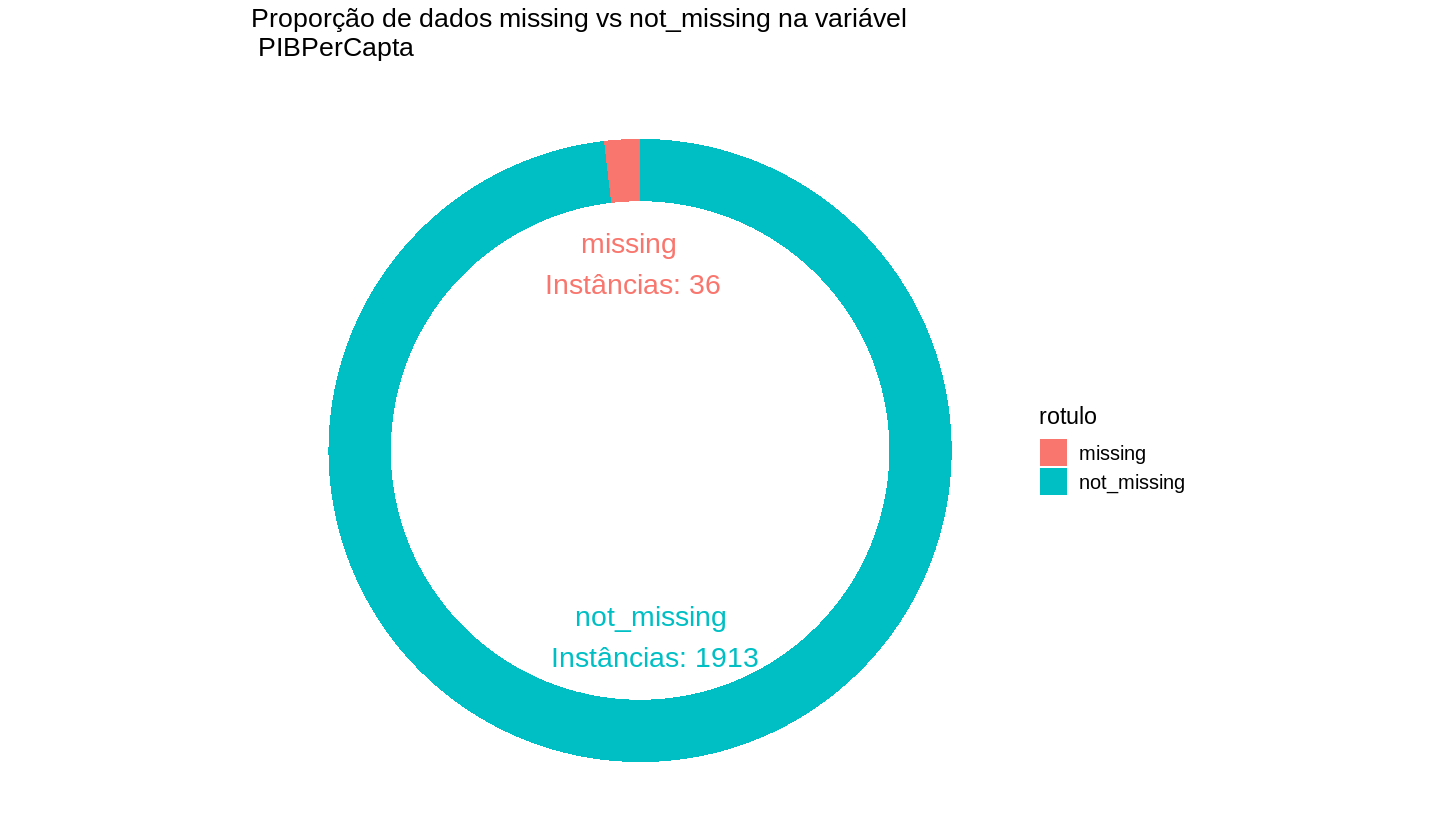

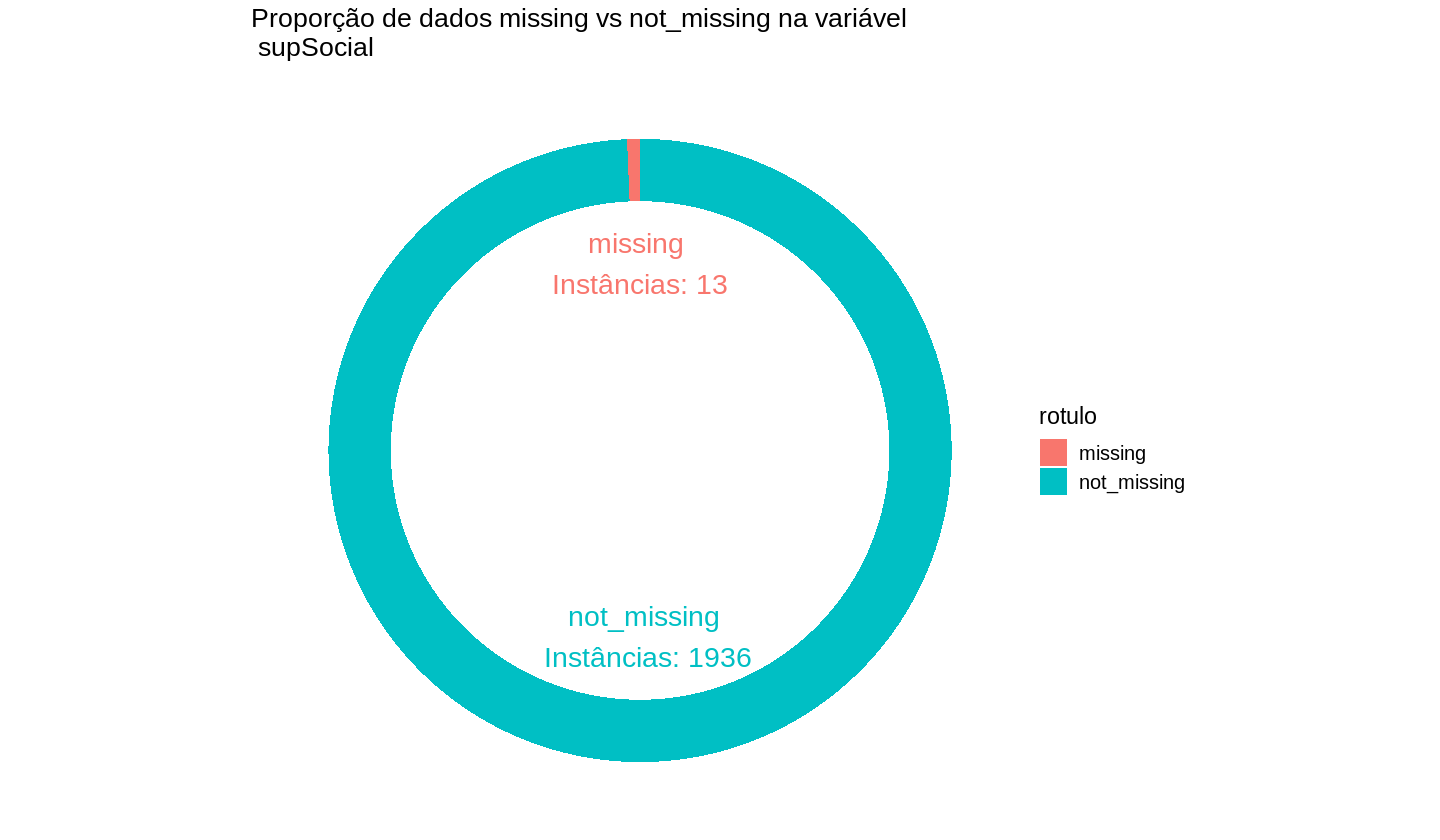

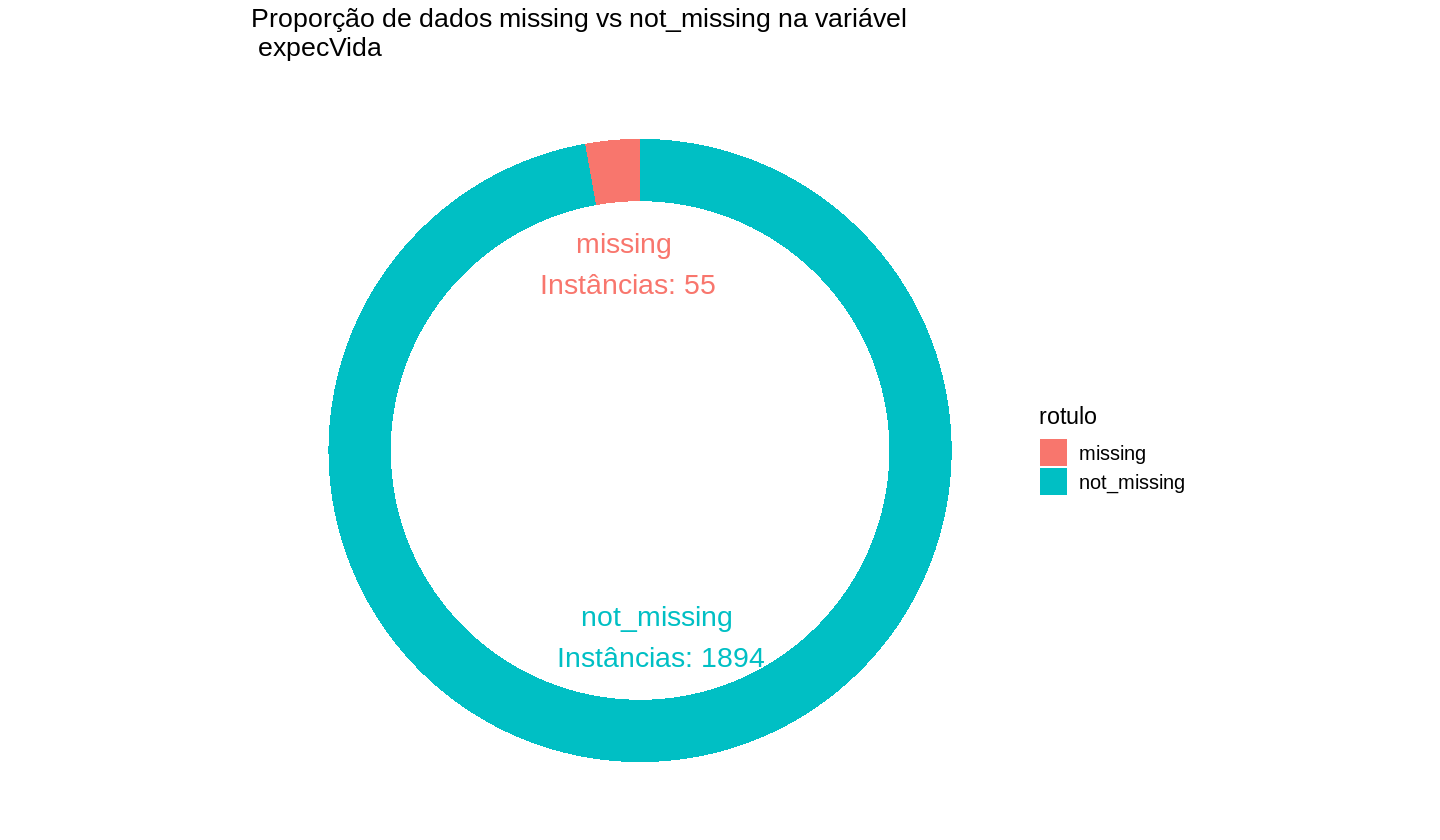

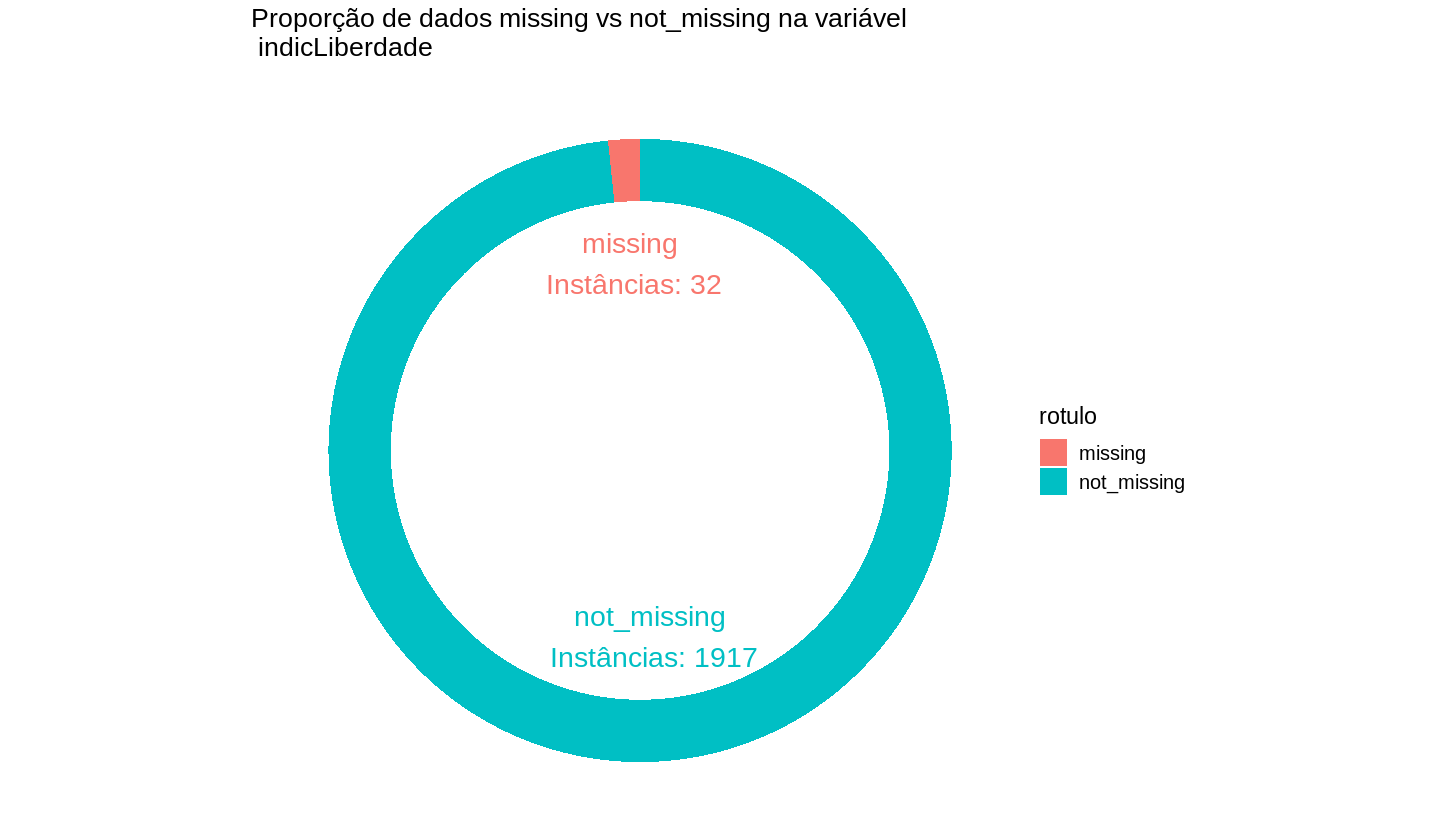

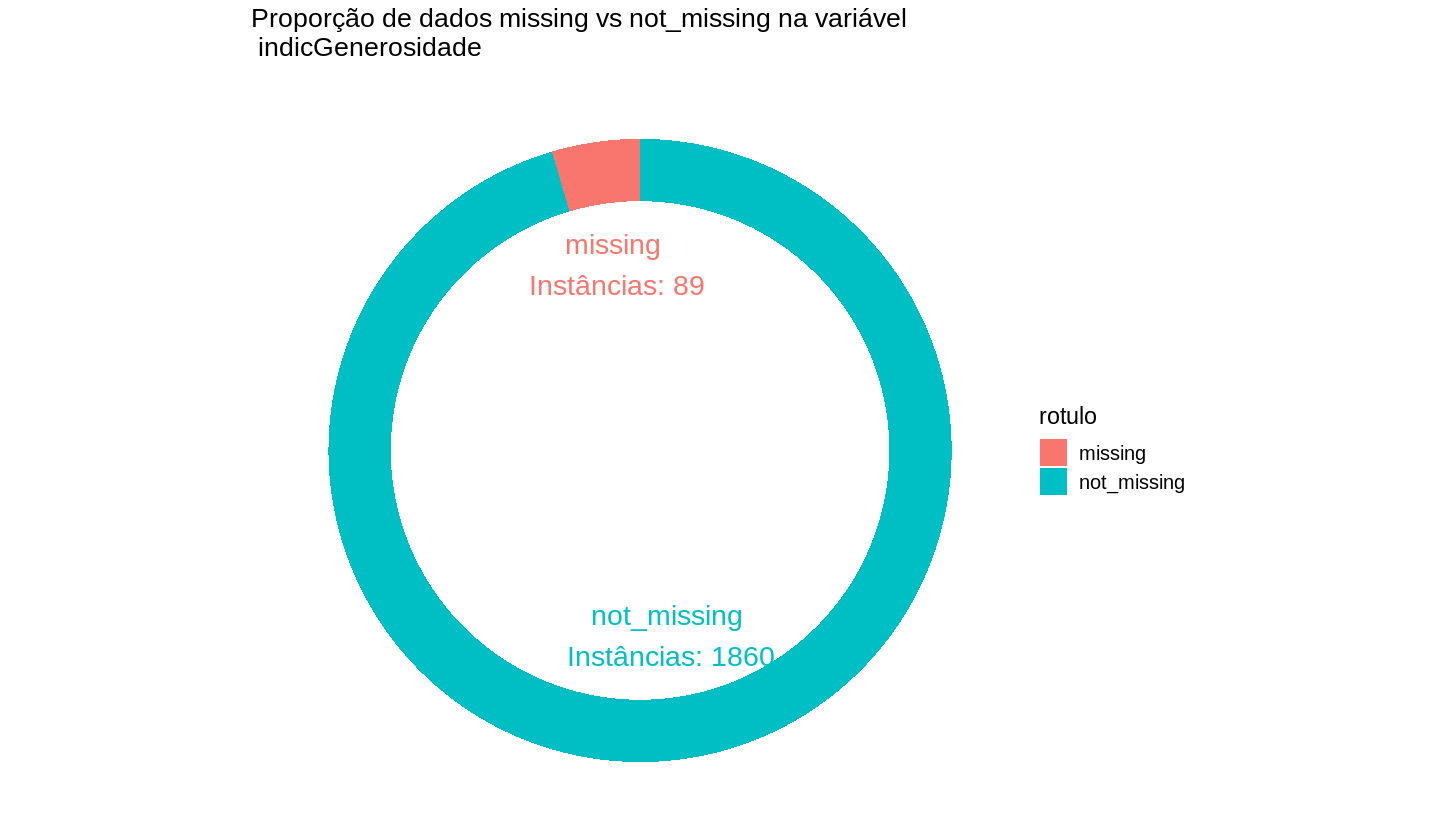

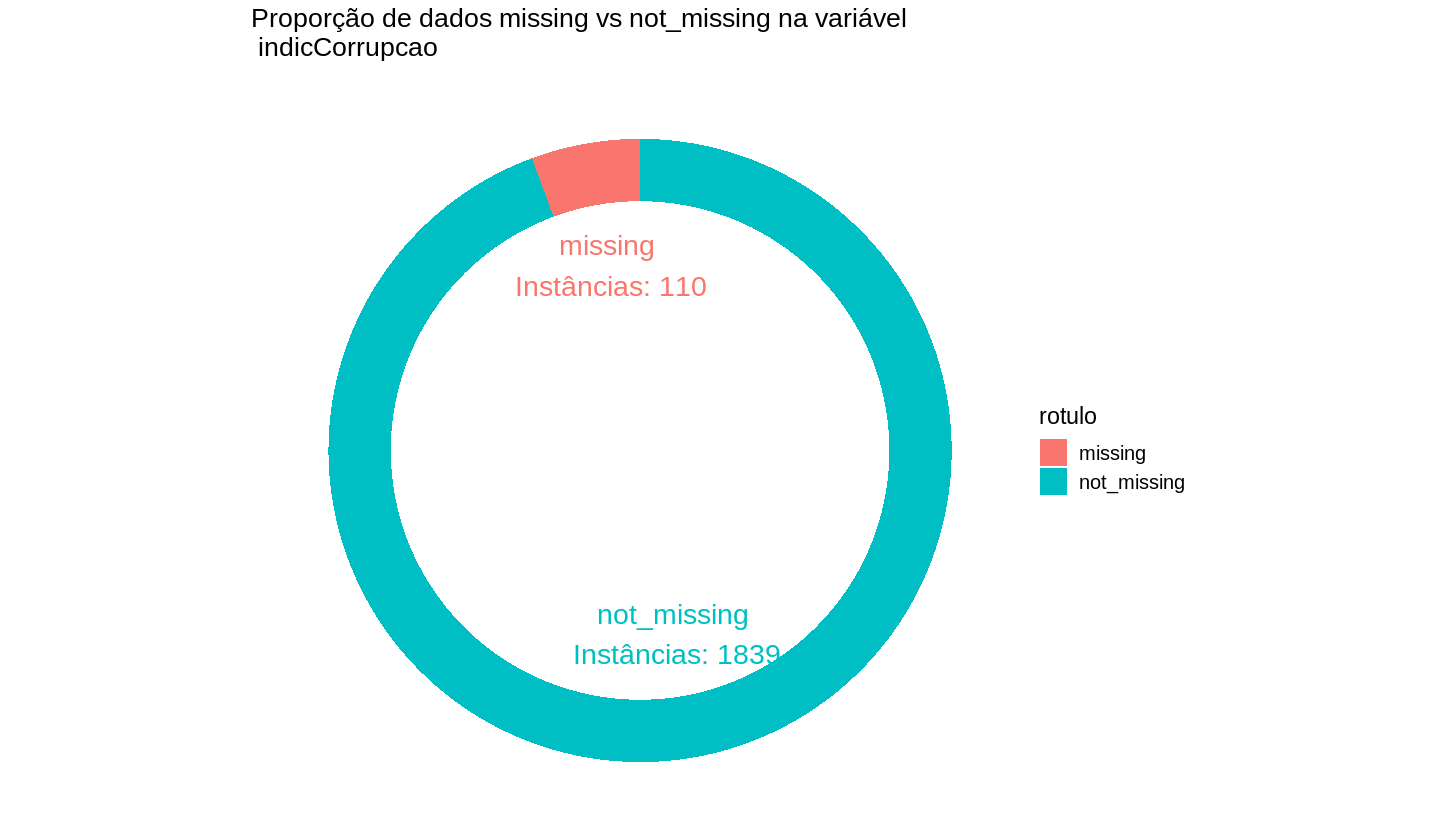

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]


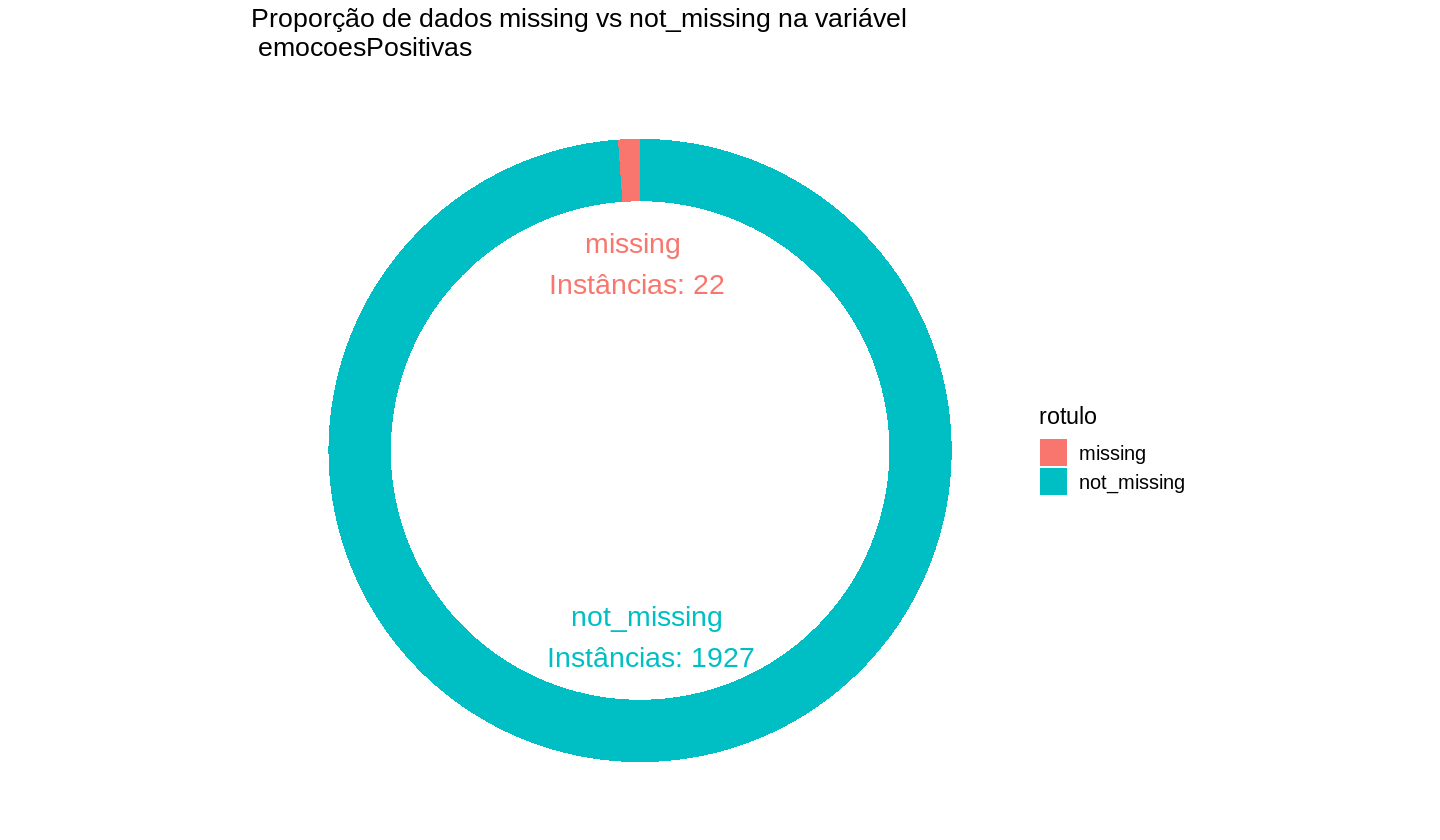

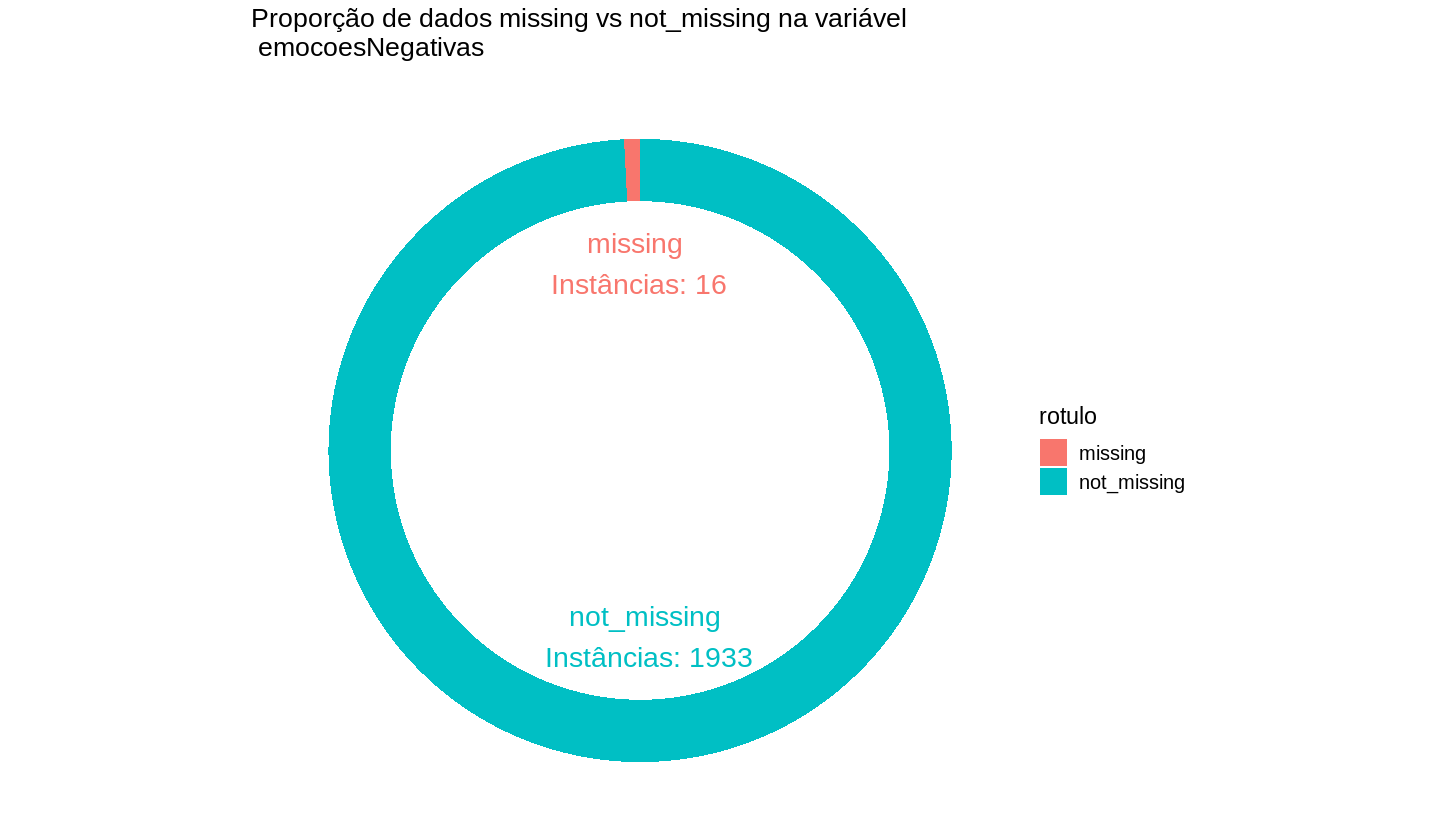

In [ ]:
lapply(colnames(dados_), missing_prop)

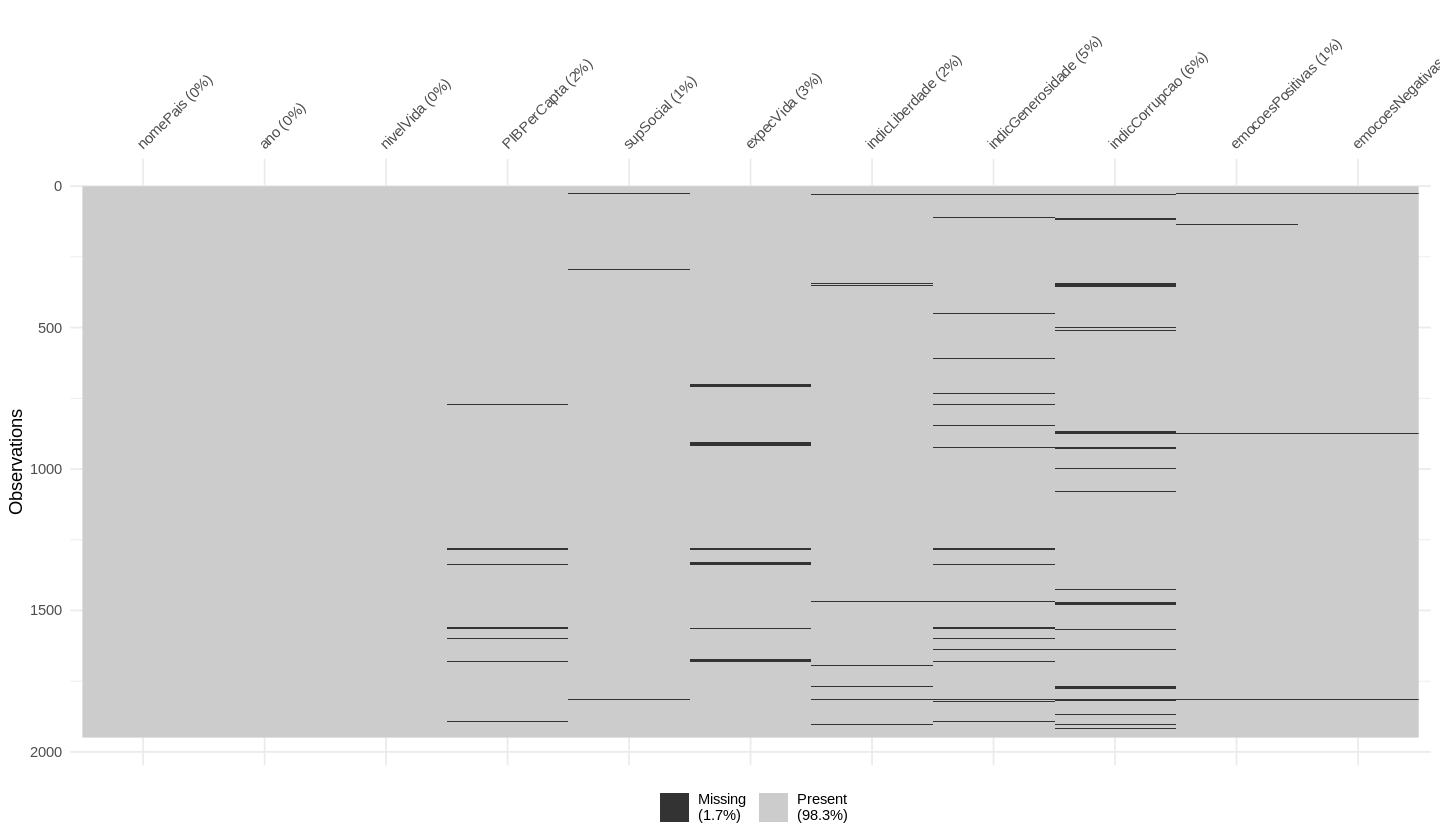

In [ ]:
vis_miss(dados_)

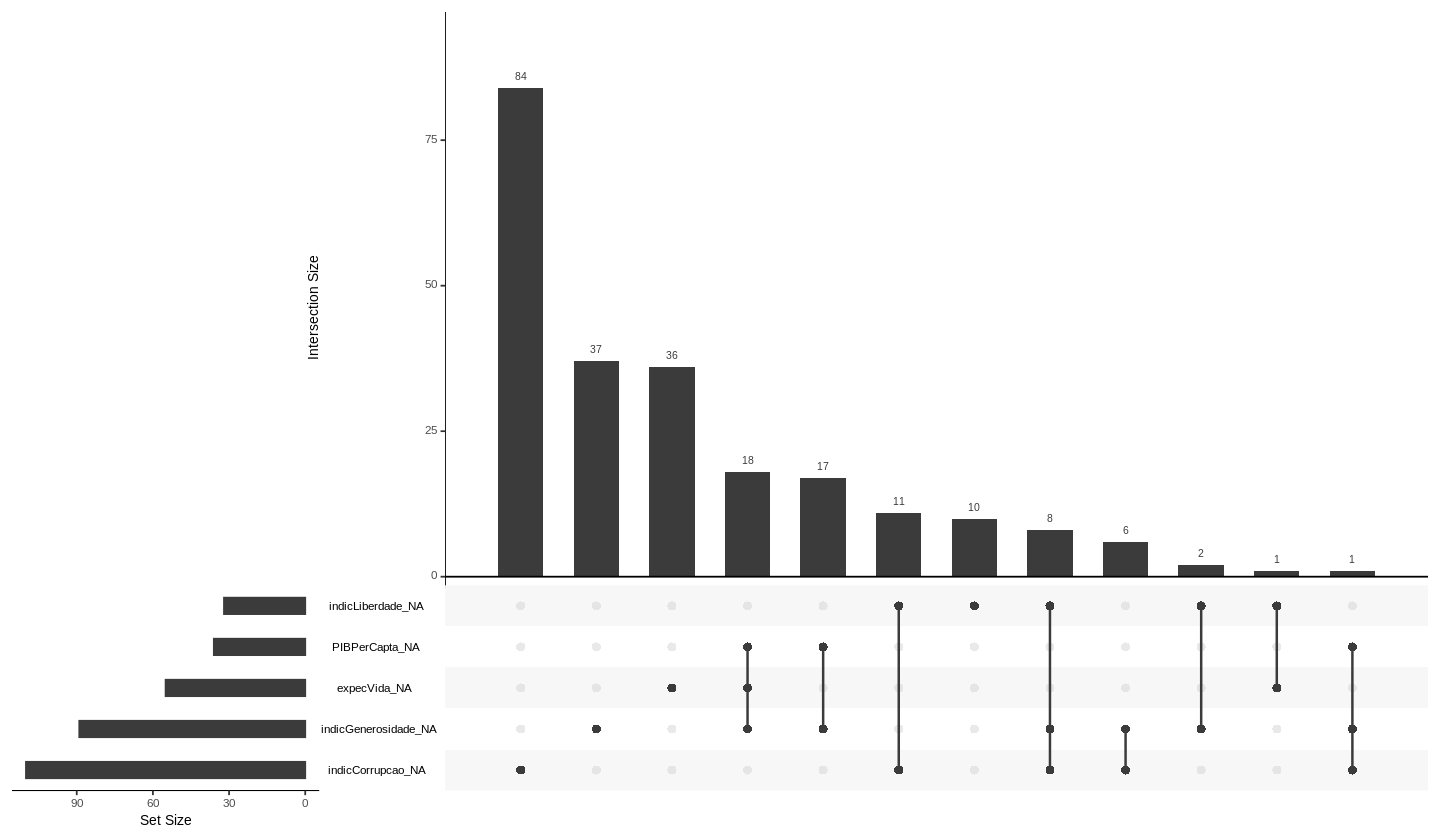

In [ ]:
gg_miss_upset(dados_)

Decisão: eliminar nas

Acompanhar perda de informação, e verificar quais países deixaram de fazer parte da análise.

In [ ]:
#Apurando lista de Países

listaPaises = unique(dados_$nomePais)

In [ ]:
# Eliminando na's
dados_ = na.omit(dados_)

In [ ]:
#Apurando lista de Países após limpeza

listaPaisesLimpo = unique(dados_$nomePais)

In [ ]:
# Verificando perda de informação

setdiff(listaPaises, listaPaisesLimpo)

[1] "China"                     "Cuba"                     
 [3] "Hong Kong S.A.R. of China" "Kosovo"                   
 [5] "Maldives"                  "North Cyprus"             
 [7] "Oman"                      "Somalia"                  
 [9] "Somaliland region"         "South Sudan"              
[11] "Turkmenistan"

Transformação - agrupamento por país, e sumarização das informações numéricas.

In [ ]:
dados_ = new_data()

Feature engineering



Vamos postergar esta atividade, para poder explorar os dados por mais de um viés.

Visualizando dados transformados

In [ ]:
head(dados_)

,nomePais,nivelVida,PIBPerCapta,supSocial,expecVida,indicLiberdade,indicGenerosidade,indicCorrupcao,emocoesPositivas,emocoesNegativas
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,3.594667,7.650833,0.5084167,52.26667,0.5181667,0.07008333,0.8433333,0.5486667,0.3265000
2,Albania,5.019385,9.384385,0.7162308,67.54615,0.6629231,-0.08269231,0.8693846,0.6538462,0.2992308
3,Algeria,5.191800,9.329400,0.8116000,65.43600,0.5044000,-0.13220000,0.7056000,0.5944000,0.2564000
4,Angola,4.420250,8.990000,0.7382500,53.55000,0.4562500,-0.08825000,0.8667500,0.6135000,0.3512500
5,Argentina,6.310133,10.033800,0.9044000,67.90000,0.7682000,-0.15986667,0.8420667,0.8334667,0.2840000
6,Armenia,4.513571,9.270357,0.7185714,65.74286,0.5637143,-0.19964286,0.8465000,0.5502143,0.4340714


### Análise exploratória

#### Univariada

##### Dados numéricos

Medidas de tendência central

Estatísticas

In [ ]:
statistic_num(dados_)

,media,mediana,moda,range,amplitude,valores_uni
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>
nivelVida,5.2986073,4.8980000,7.776,3.59466666666667 7.776,4.1813333,25
PIBPerCapta,9.0611463,9.3961818,9.84333333333333,6.748 11.079,4.3310000,25
supSocial,0.7755663,0.7975000,0.947,0.422 0.947,0.5250000,25
expecVida,60.4556345,62.5400000,72.78,45.74 72.78,27.0400000,25
indicLiberdade,0.7235973,0.7360000,0.947,0.49 0.947,0.4570000,25
indicGenerosidade,-0.0259904,-0.0620000,0.320333333333333,-0.1845 0.320333333333333,0.5048333,25
indicCorrupcao,0.7489986,0.7695000,0.806,0.323 0.953272727272727,0.6302727,24
emocoesPositivas,0.7188473,0.7223333,0.906,0.531833333333333 0.906,0.3741667,25
emocoesNegativas,0.2507727,0.2351667,0.446333333333333,0.134 0.446333333333333,0.3123333,25


Medidas de dispersão

Estatísticas

In [ ]:
dispersion_num(dados_)

,desvio_padrao,coef.variacao,iqr
,<dbl>,<dbl>,<dbl>
nivelVida,1.18467445,0.2235822,1.4752500
PIBPerCapta,1.24379226,0.1372665,2.2168833
supSocial,0.13354350,0.1721884,0.1557273
expecVida,7.82851220,0.1294919,13.7266667
indicLiberdade,0.11767199,0.1626208,0.1275000
indicGenerosidade,0.12840620,-4.9405235,0.1975833
indicCorrupcao,0.13462786,0.1797438,0.1531667
emocoesPositivas,0.09995317,0.1390465,0.1402727
emocoesNegativas,0.07494752,0.2988664,0.1171818


Gráficos

Distribuição de frequências

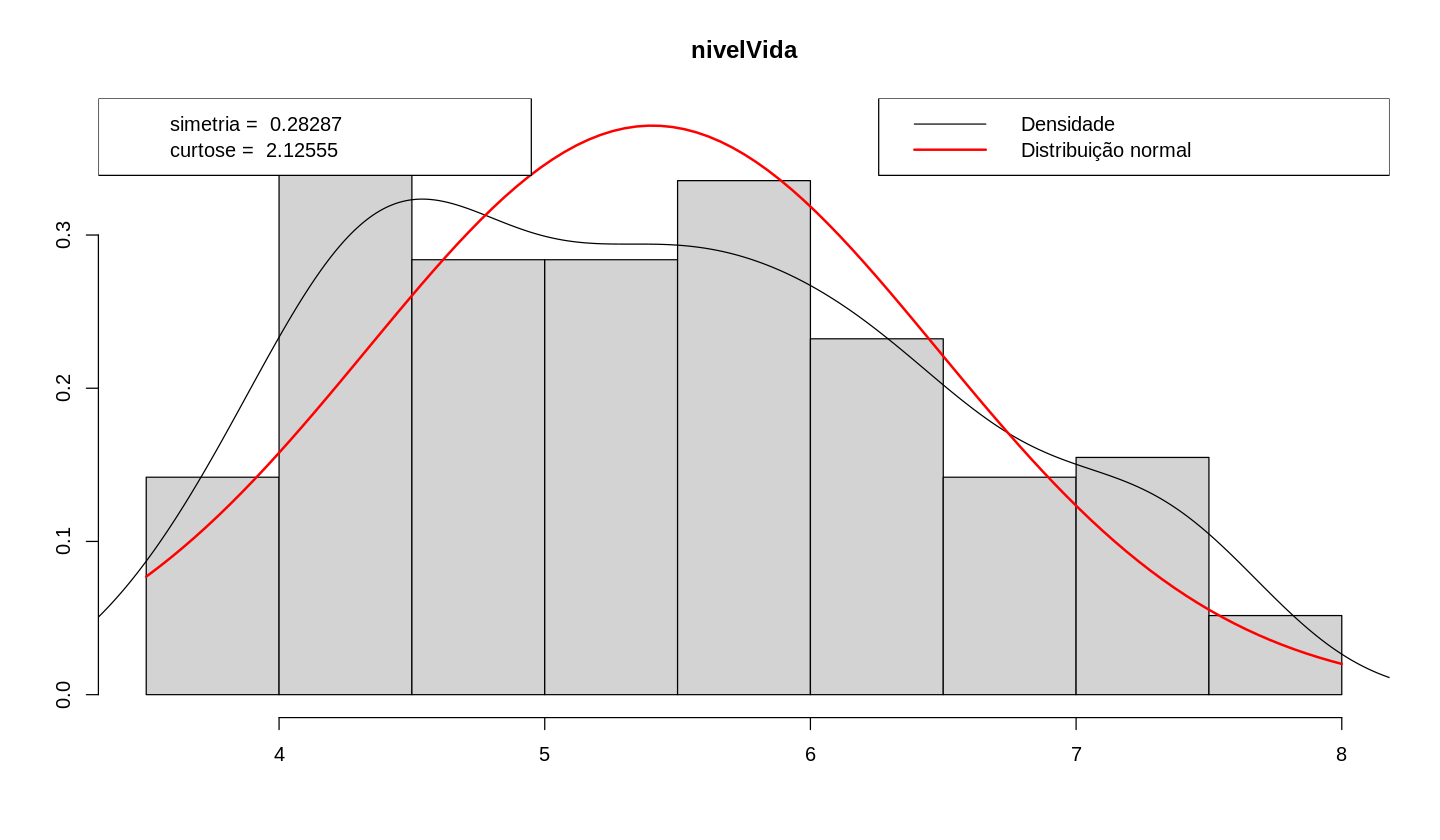

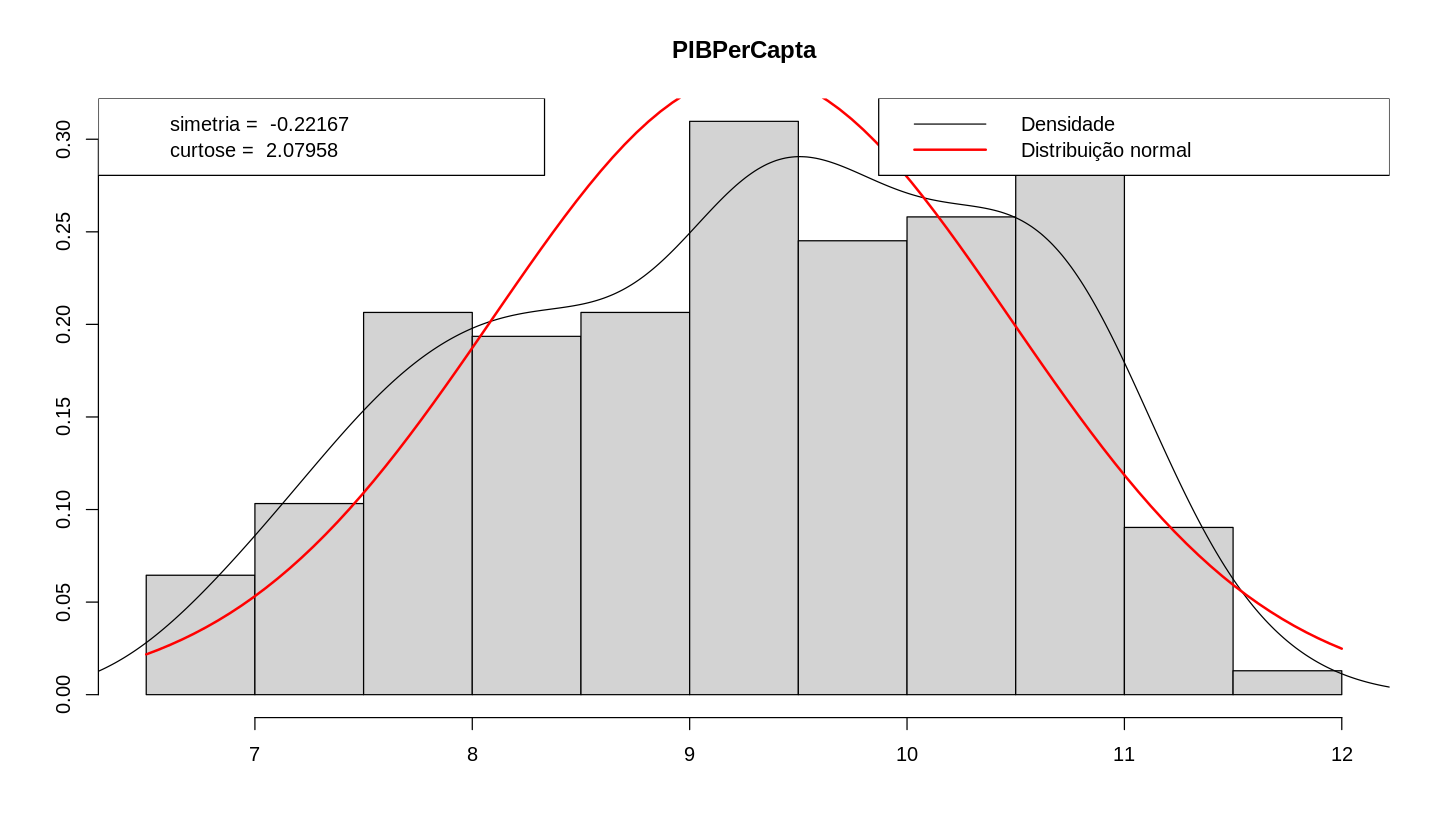

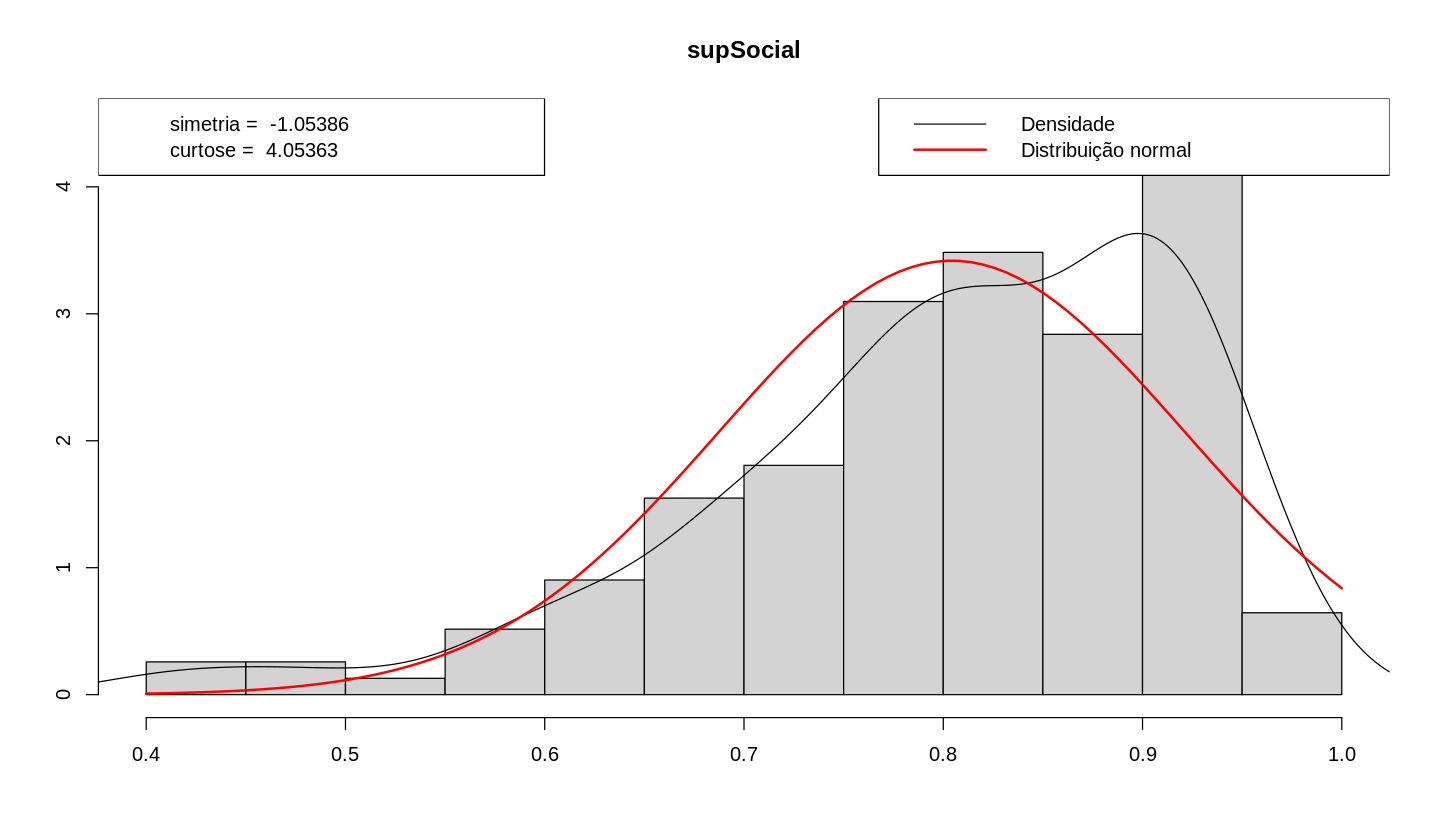

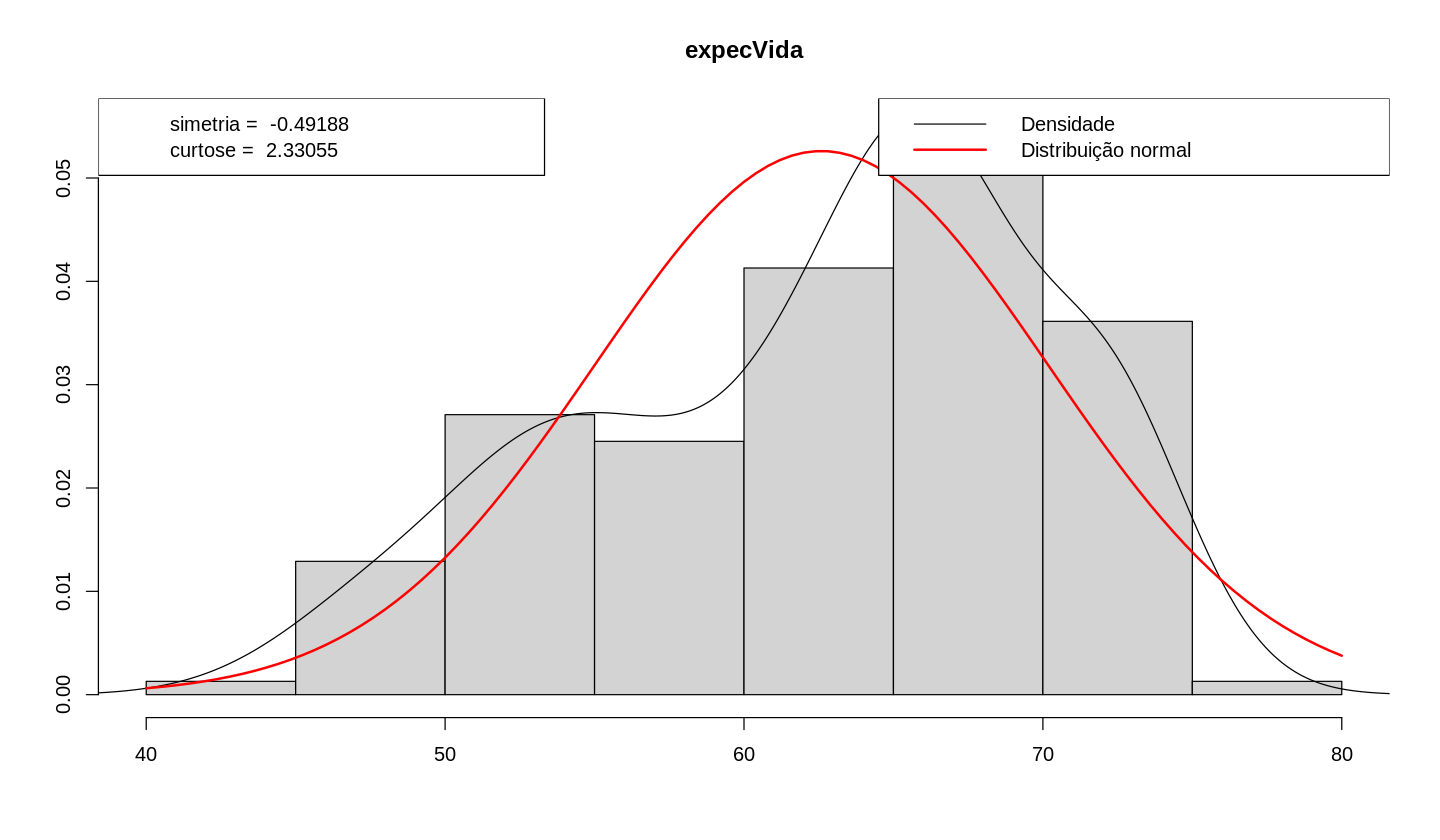

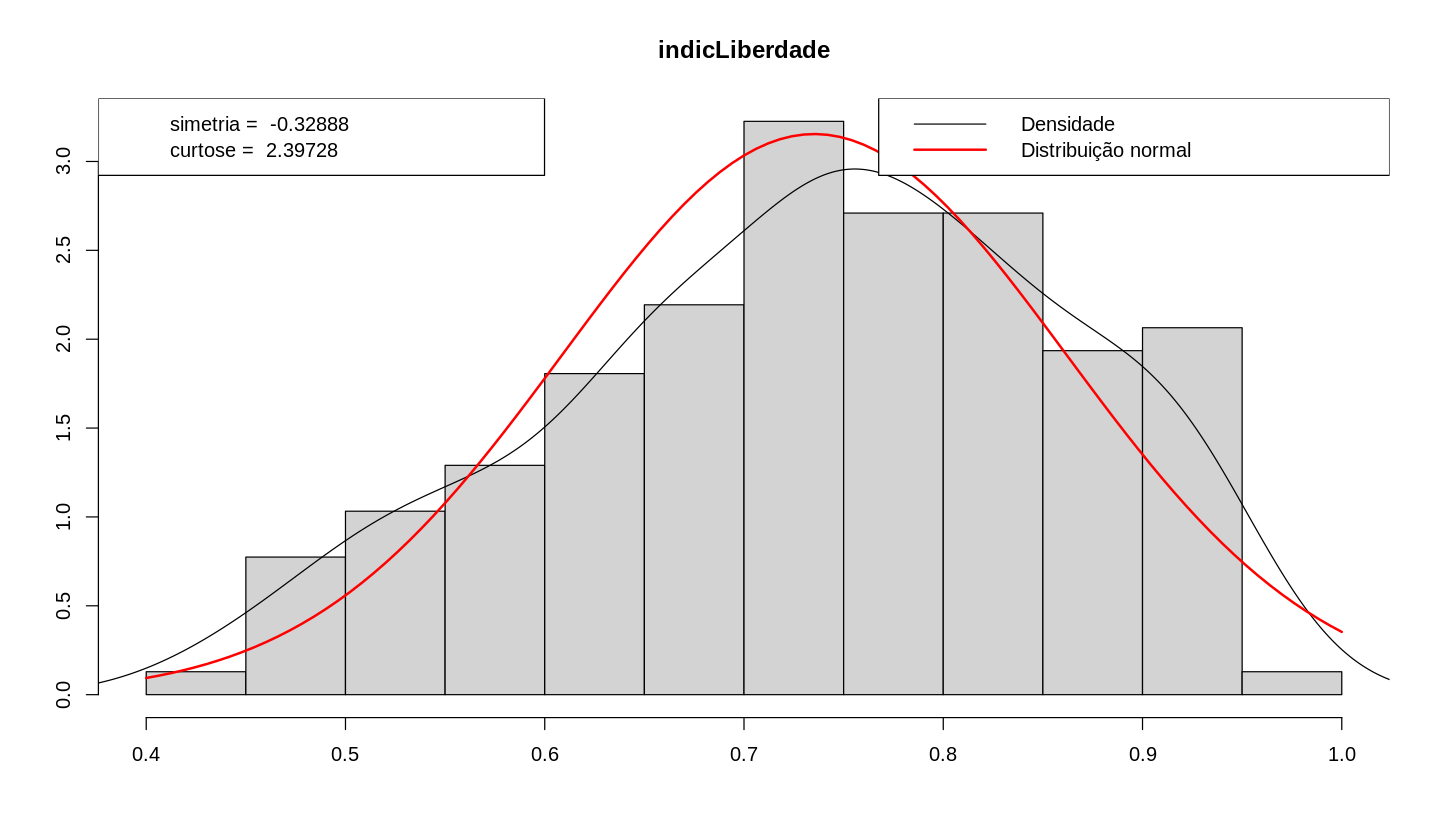

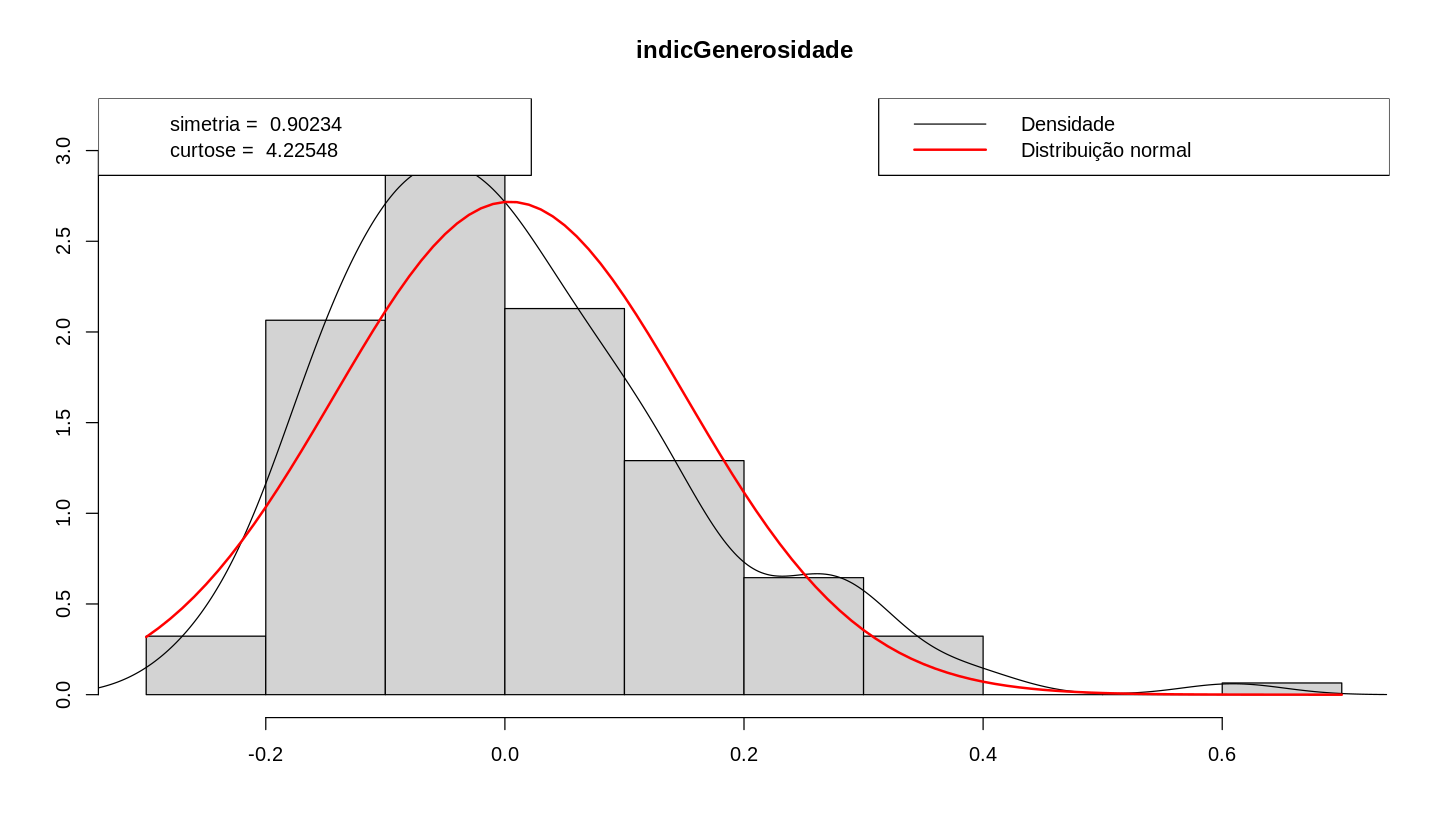

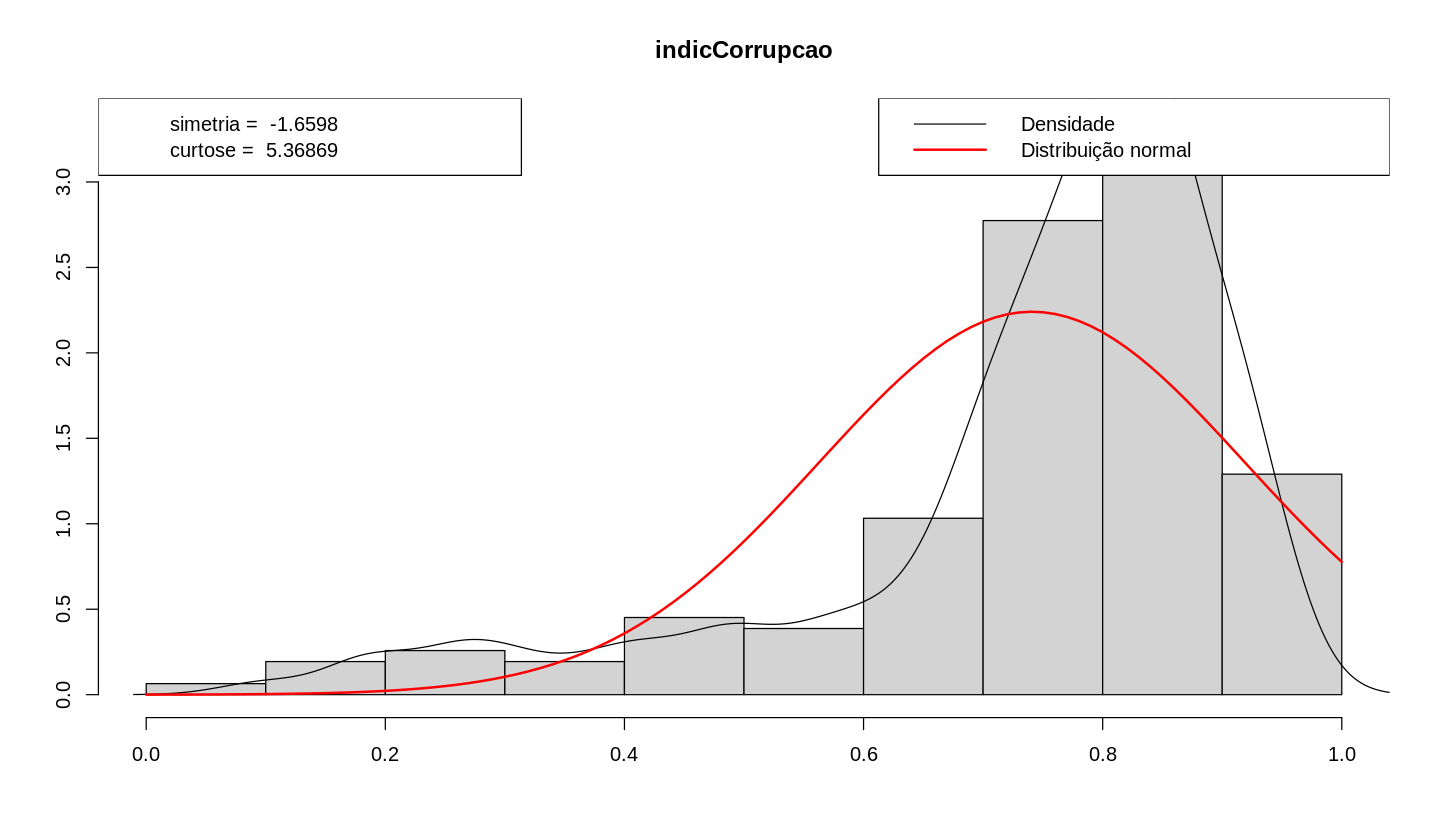

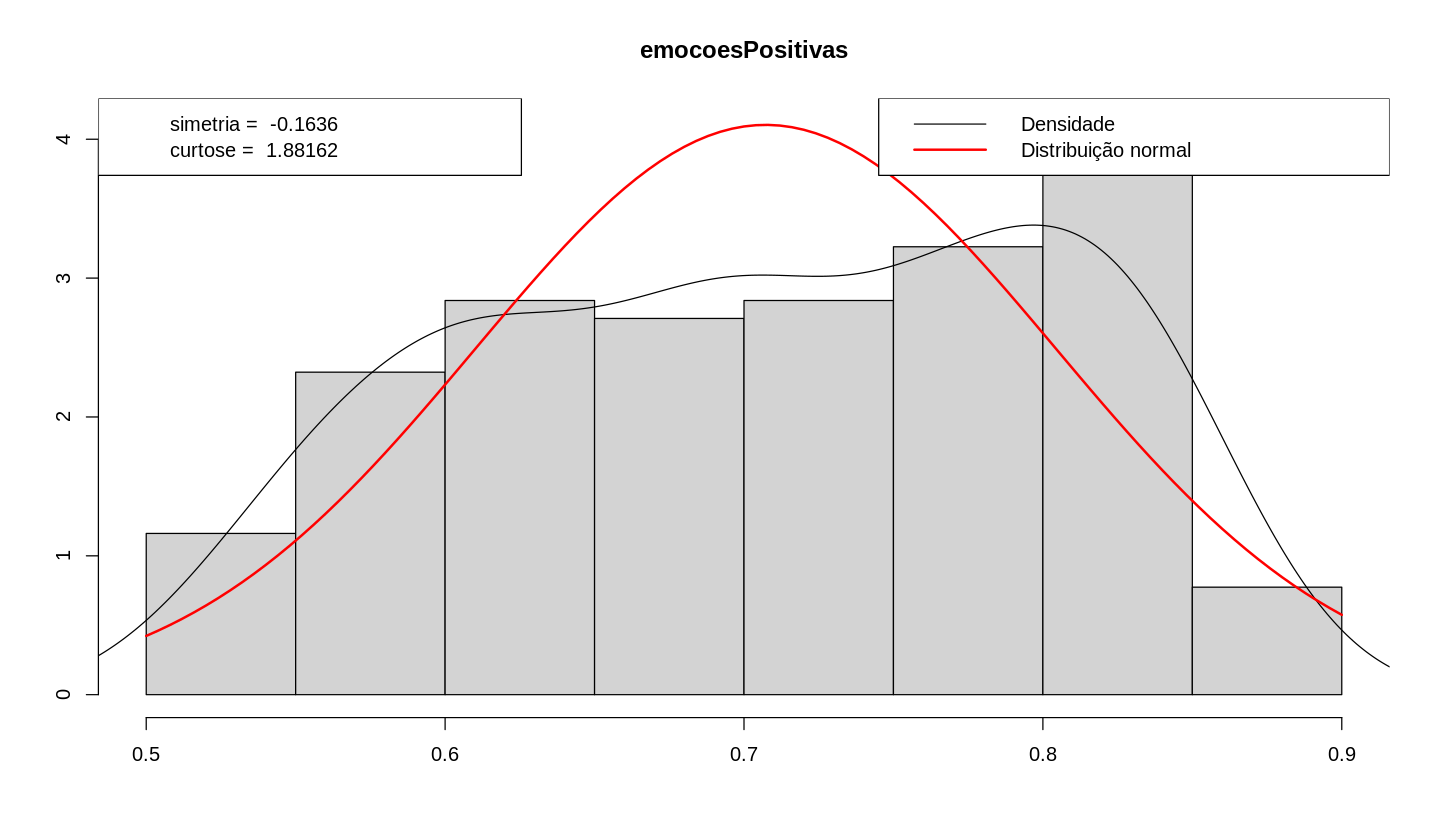

[[1]]
[[1]]$rect
[[1]]$rect$w
[1] 1.629453

[[1]]$rect$h
[1] 0.05023703

[[1]]$rect$left
[1] 3.32

[[1]]$rect$top
[1] 0.3891613


[[1]]$text
[[1]]$text$x
[1] 3.588673 3.588673

[[1]]$text$y
[1] 0.3724156 0.3556699



[[2]]
[[2]]$rect
[[2]]$rect$w
[1] 2.052365

[[2]]$rect$h
[1] 0.04157548

[[2]]$rect$left
[1] 6.28

[[2]]$rect$top
[1] 0.3220645


[[2]]$text
[[2]]$text$x
[1] 6.608378 6.608378

[[2]]$text$y
[1] 0.3082060 0.2943475



[[3]]
[[3]]$rect
[[3]]$rect$w
[1] 0.2238943

[[3]]$rect$h
[1] 0.606309

[[3]]$rect$left
[1] 0.376

[[3]]$rect$top
[1] 4.696774


[[3]]$text
[[3]]$text$x
[1] 0.4118231 0.4118231

[[3]]$text$y
[1] 4.494671 4.292568



[[4]]
[[4]]$rect
[[4]]$rect$w
[1] 14.92629

[[4]]$rect$h
[1] 0.00744894

[[4]]$rect$left
[1] 38.4

[[4]]$rect$top
[1] 0.05770323


[[4]]$text
[[4]]$text$x
[1] 40.78821 40.78821

[[4]]$text$y
[1] 0.05522025 0.05273727



[[5]]
[[5]]$rect
[[5]]$rect$w
[1] 0.2238943

[[5]]$rect$h
[1] 0.4330779

[[5]]$rect$left
[1] 0.376

[[5]]$rect$top
[1] 3.354839


[[5]]$text
[[5]]$text$x
[1] 0.4118231 0.4118231

[[5]]$text$y
[1] 3.210479 3.066120



[[6]]
[[6]]$rect
[[6]]$rect$w
[1] 0.3621007

[[6]]$rect$h
[1] 0.4244163

[[6]]$rect$left
[1] -0.34

[[6]]$rect$top
[1] 3.287742


[[6]]$text
[[6]]$text$x
[1] -0.2802948 -0.2802948

[[6]]$text$y
[1] 3.146270 3.004798



[[7]]
[[7]]$rect
[[7]]$rect$w
[1] 0.3538084

[[7]]$rect$h
[1] 0.450401

[[7]]$rect$left
[1] -0.04

[[7]]$rect$top
[1] 3.489032


[[7]]$text
[[7]]$text$x
[1] 0.01970516 0.01970516

[[7]]$text$y
[1] 3.338899 3.188765



[[8]]
[[8]]$rect
[[8]]$rect$w
[1] 0.1415233

[[8]]$rect$h
[1] 0.5543397

[[8]]$rect$left
[1] 0.484

[[8]]$rect$top
[1] 4.294194


[[8]]$text
[[8]]$text$x
[1] 0.5078821 0.5078821

[[8]]$text$y
[1] 4.109414 3.924634



[[9]]
[[9]]$rect
[[9]]$rect$w
[1] 0.1629453

[[9]]$rect$h
[1] 0.7795402

[[9]]$rect$left
[1] 0.082

[[9]]$rect$top
[1] 6.03871


[[9]]$text
[[9]]$text$x
[1] 0.1088673 0.1088673

[[9]]$text$y
[1] 5.778863 5.519016

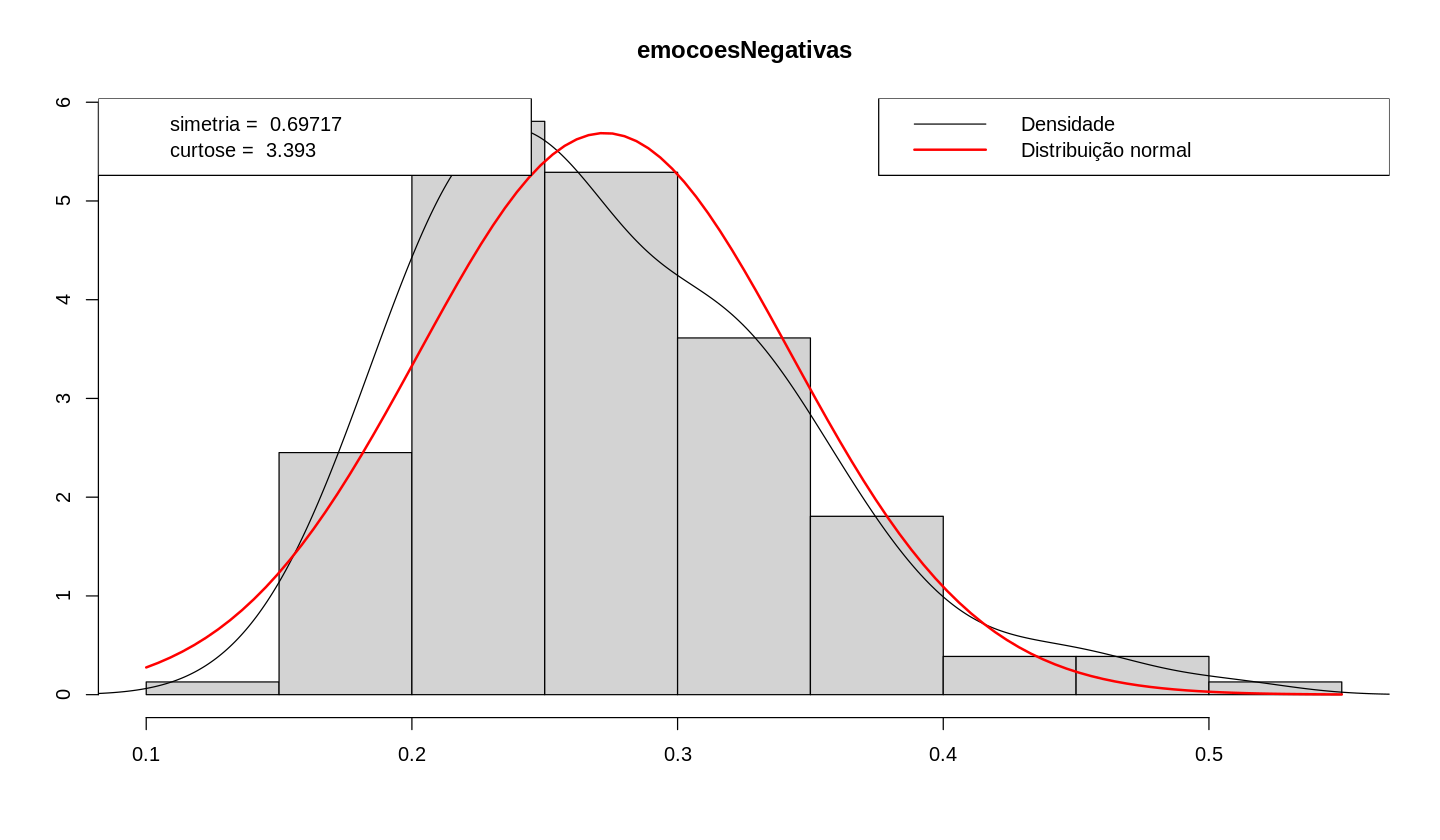

In [ ]:
labels = dados_ %>% select(where(is.numeric)) %>% colnames()

lapply(labels, histograma)

Boxplot

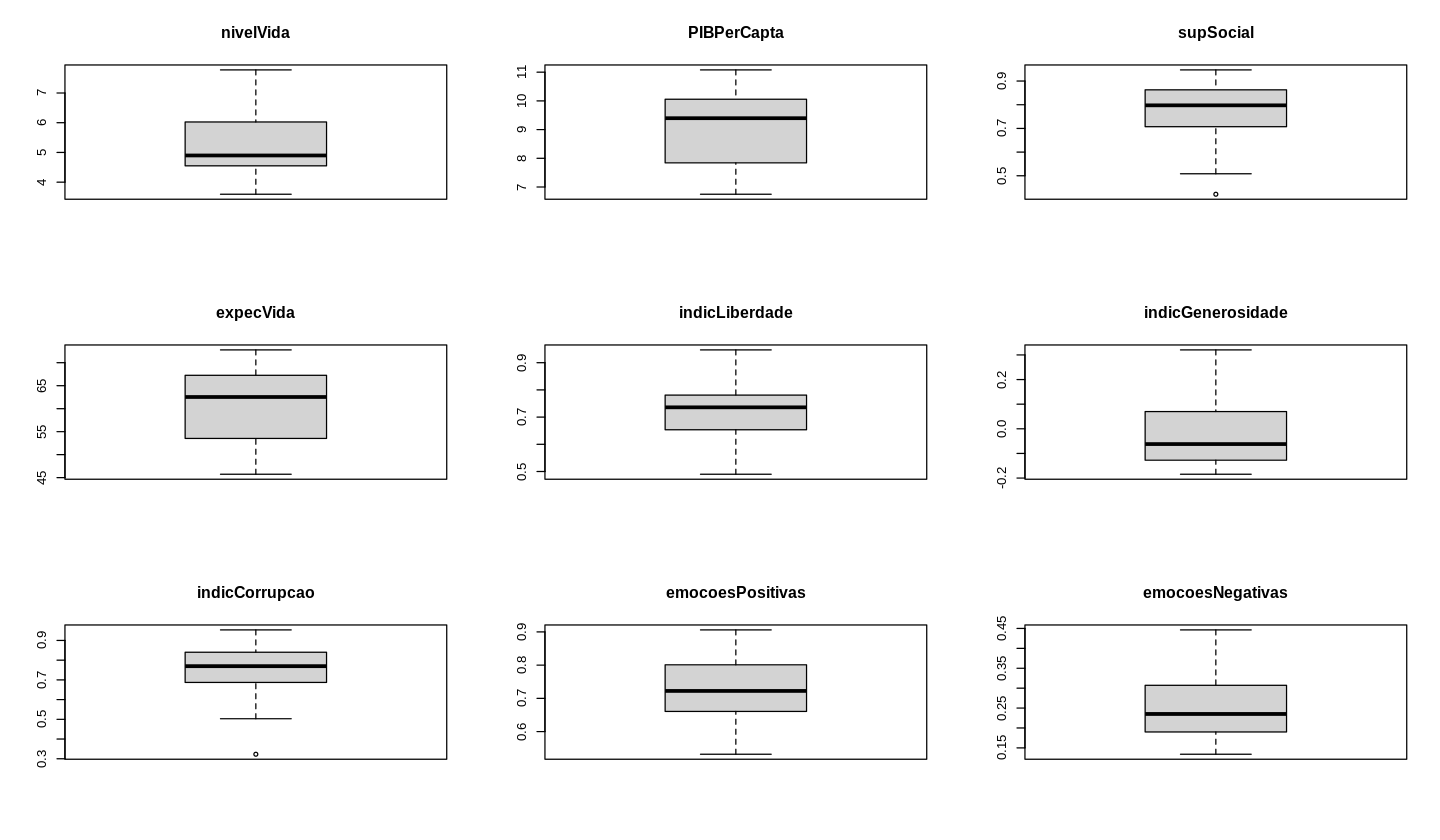

In [ ]:
boxplot_grapf(dados_)

#### Bivariada

##### Dados numéricos

Correlação

[[1]]

[[2]]


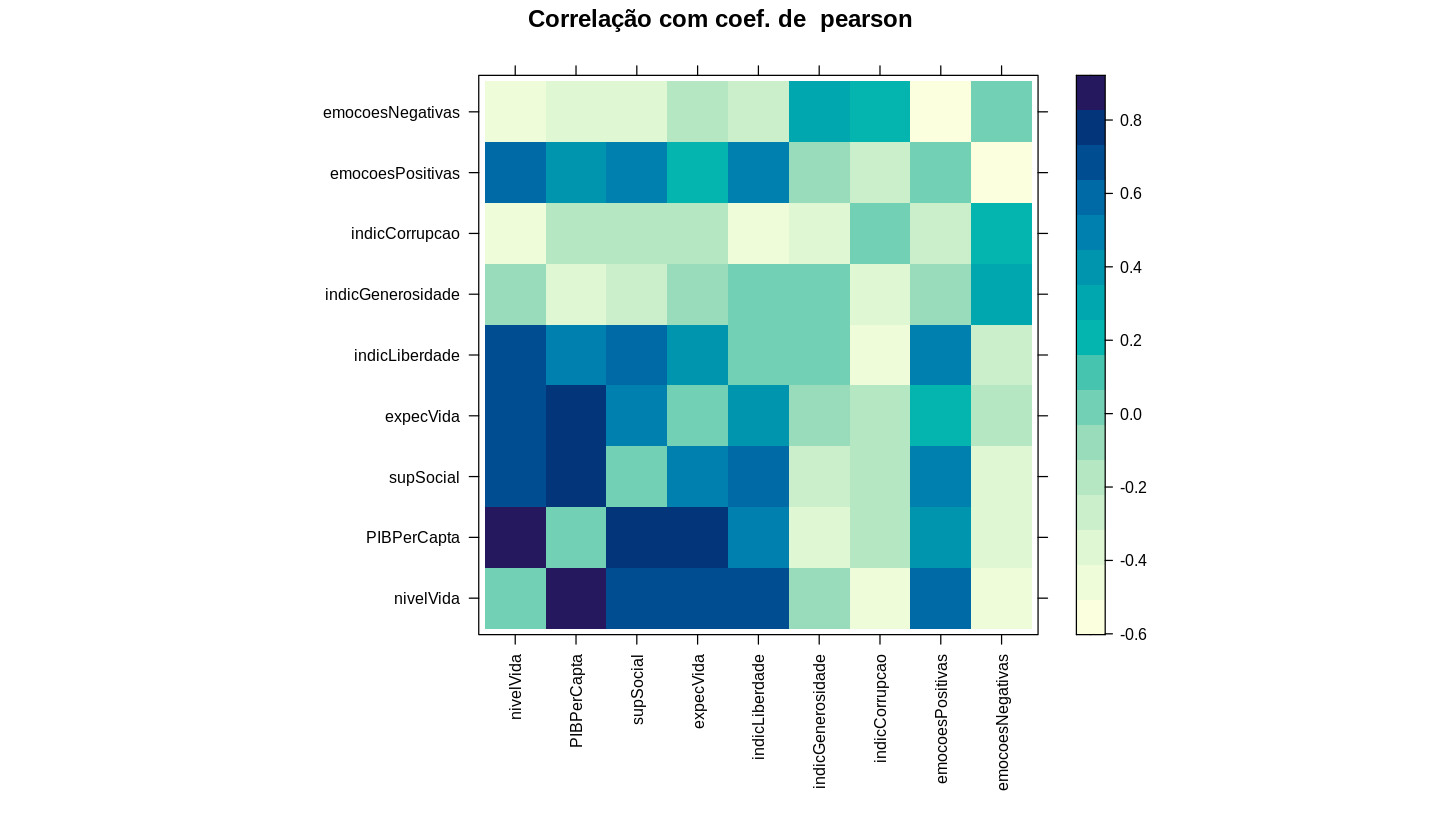

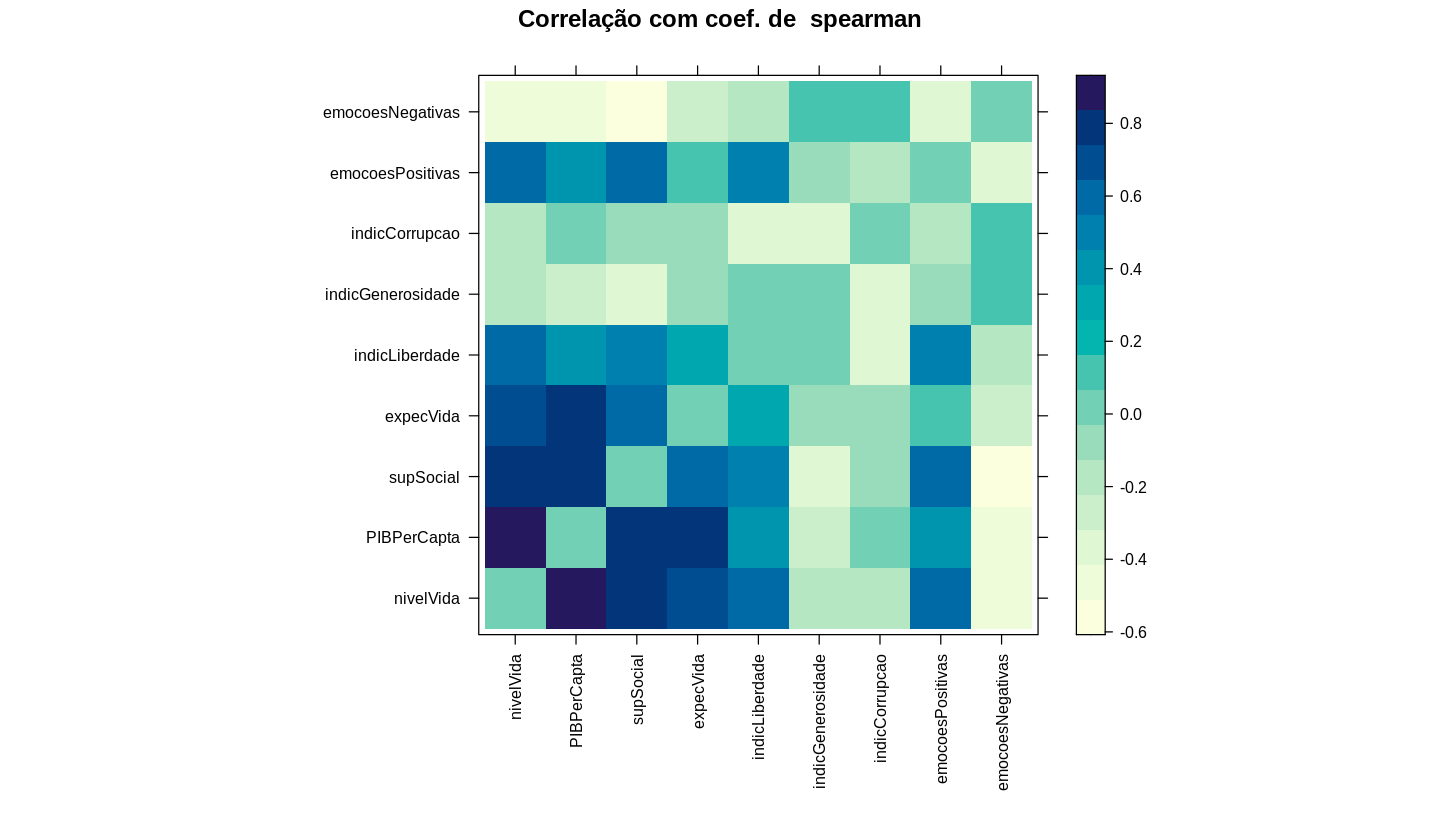

In [ ]:
#Filtrando dados numéricos
dados = dados_ %>% select(where(is.numeric))

#Definindo coeficientes
methods = c("pearson", "spearman")

#Calculando correlações
cors = lapply(methods, function(coef)cor(dados, method = coef))

#Gerando plots
Map(plot_cor, cors, methods)

Scatter Plot

Visualizando dispersão dos dados entre 'expecVida' x 'PIBPerCapta'

In [ ]:
names(dados_)

[1] "nomePais"          "nivelVida"         "PIBPerCapta"      
 [4] "supSocial"         "expecVida"         "indicLiberdade"   
 [7] "indicGenerosidade" "indicCorrupcao"    "emocoesPositivas" 
[10] "emocoesNegativas"

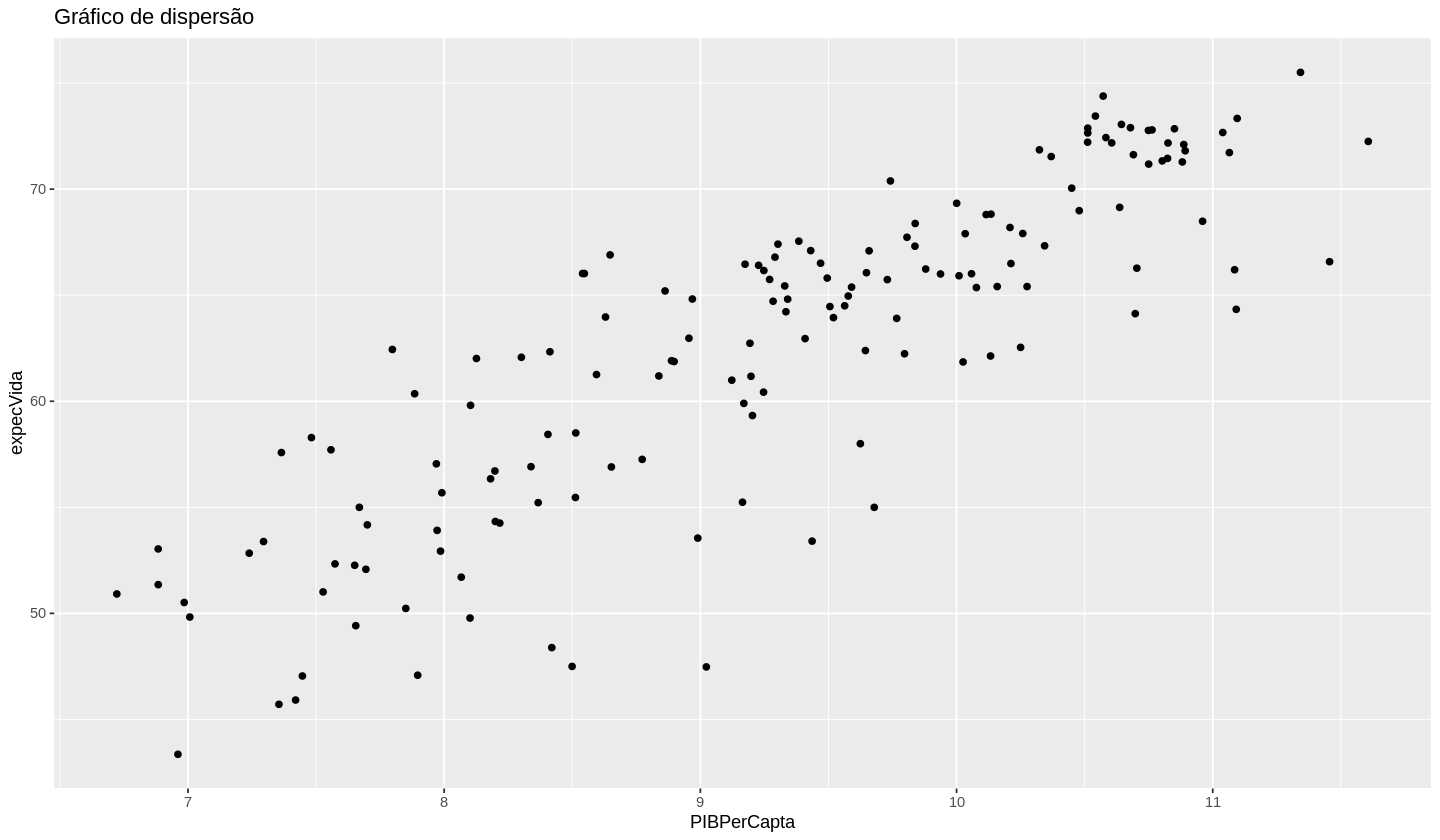

In [ ]:
scatterPlot(xAxis = 'PIBPerCapta', yAxis = 'expecVida' )

### Refazendo o DataMunging (Feature Engineering)

In [ ]:
dados_$class <- ifelse(dados_$PIBPerCapta < 8.3924, "pobre", "rico")

Visualizando

In [ ]:
head(dados_)

,nomePais,nivelVida,PIBPerCapta,supSocial,expecVida,indicLiberdade,indicGenerosidade,indicCorrupcao,emocoesPositivas,emocoesNegativas,class
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,3.594667,7.650833,0.5084167,52.26667,0.5181667,0.07008333,0.8433333,0.5486667,0.3265000,pobre
2,Albania,5.019385,9.384385,0.7162308,67.54615,0.6629231,-0.08269231,0.8693846,0.6538462,0.2992308,rico
3,Algeria,5.191800,9.329400,0.8116000,65.43600,0.5044000,-0.13220000,0.7056000,0.5944000,0.2564000,rico
4,Angola,4.420250,8.990000,0.7382500,53.55000,0.4562500,-0.08825000,0.8667500,0.6135000,0.3512500,rico
5,Argentina,6.310133,10.033800,0.9044000,67.90000,0.7682000,-0.15986667,0.8420667,0.8334667,0.2840000,rico
6,Armenia,4.513571,9.270357,0.7185714,65.74286,0.5637143,-0.19964286,0.8465000,0.5502143,0.4340714,rico


### Refazendo Análise exploratória

#### Bivariada

Fazendo split dos dados de acordo com a classificação "pobre"/"rico"

In [ ]:
pobre = subset(dados_, class == 'pobre')
rico = subset(dados_, class == 'rico')

Plotando matriz de correlação para países pobre

In [ ]:
#Definindo variáveis numéricas
cols = dados_ %>% select(where(is.numeric)) %>% colnames()

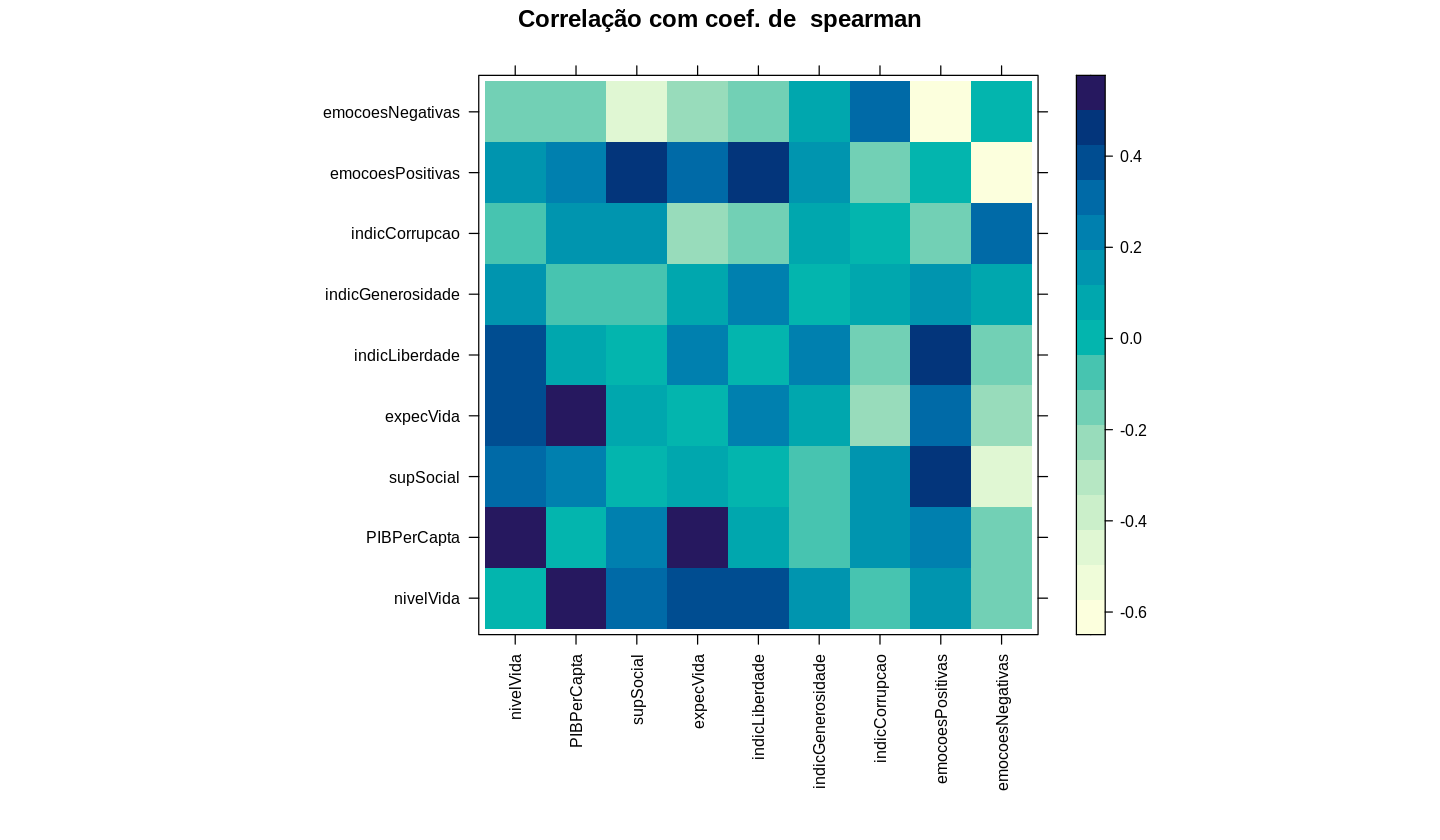

In [ ]:
#Países pobres
corsPobre = cor(pobre[, cols], method = 'spearman')
plot_cor(corsPobre, label = 'spearman')

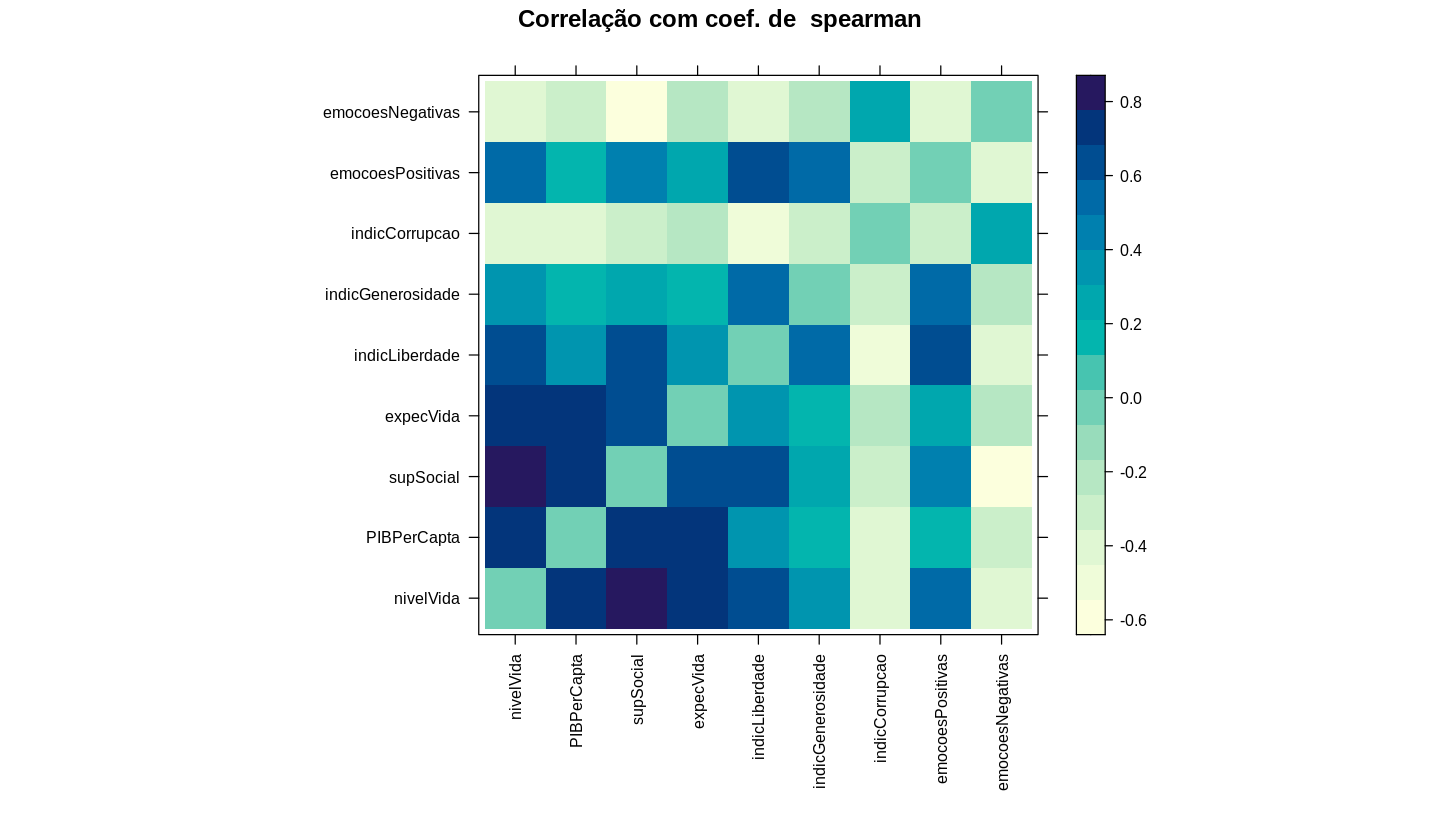

In [ ]:
# Países ricos
corsRico = cor(rico[, cols], method = 'spearman')
plot_cor(corsRico, label = 'spearman')


### Respondendo às questões de negócio

Pergunta 1:O aumento do PIB per capita de um país afeta positivamente a expectativa de vida dos cidadãos ao nascer?Qual a correlação entre essas duas variáveis?

In [ ]:
message("Sim. A matriz de correlação acima demonstra haver correlação positiva forte (",
round(cor(dados_$PIBPerCapta, dados_$expecVida, method = 'spearman'), 2), ") entre estas duas variáveis.")

Sim. A matriz de correlação acima demonstra haver correlação positiva forte (0.86) entre estas duas variáveis.



Visualizando a correlação em um gráfico de dispersão

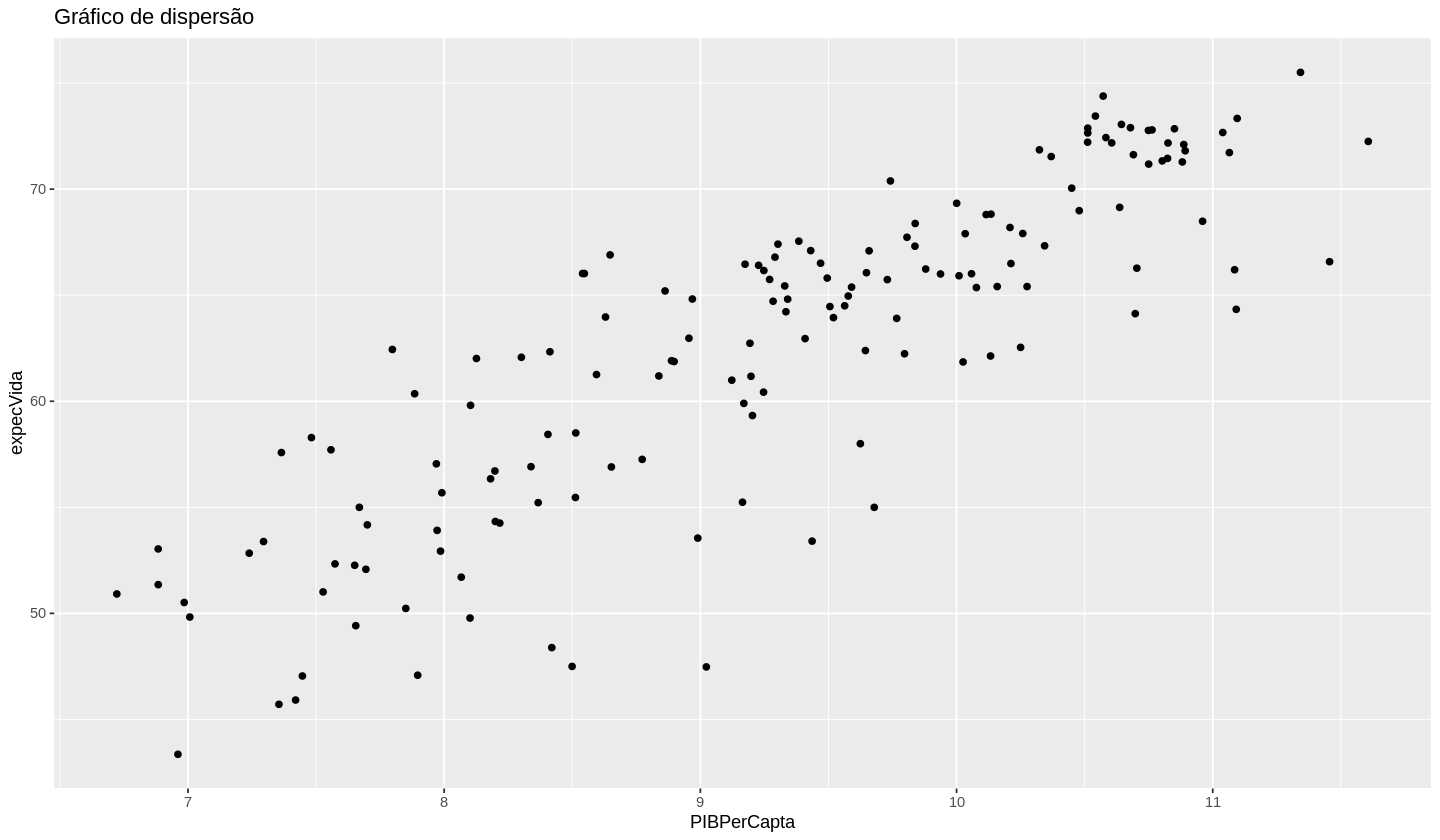

In [ ]:
scatterPlot(xAxis = 'PIBPerCapta', yAxis = 'expecVida')

Perceptível, portanto, que, à medidade que o PIB *per capta* aumenta, a expectativa de vida tende a aumentar também.

**Insigth:** observe, contudo, que esta correlação pode ser mais forte em países com PIB *per capta* menos elevado. Este padrão foi demonstrado pelas matrizes de correlação acima, e, também no gráfico de dispersão (a dispersão apresenta dois padrões diferentes de acordo com o PIB).

Pergunta 2: Existe uma correlação entre a escala de vida e a conscientização do público em geral sobre a corrupção nos negócios e no governo? Qual a correlação entre essas duas variáveis?

Sim. existe uma correlação negativa fraca.


In [ ]:
names(dados_)

[1] "nomePais"          "nivelVida"         "PIBPerCapta"      
 [4] "supSocial"         "expecVida"         "indicLiberdade"   
 [7] "indicGenerosidade" "indicCorrupcao"    "emocoesPositivas" 
[10] "emocoesNegativas"  "class"

In [ ]:
# Medindo correlação
message("Sim. A matriz de correlação acima demonstra haver correlação negativa fraca (",
round(cor(dados_$nivelVida, dados_$indicCorrupcao, method = 'spearman'), 2), ") entre estas duas variáveis.")

Sim. A matriz de correlação acima demonstra haver correlação negativa fraca (-0.29) entre estas duas variáveis.



Visualizando a correlação em um gráfico de dispersão

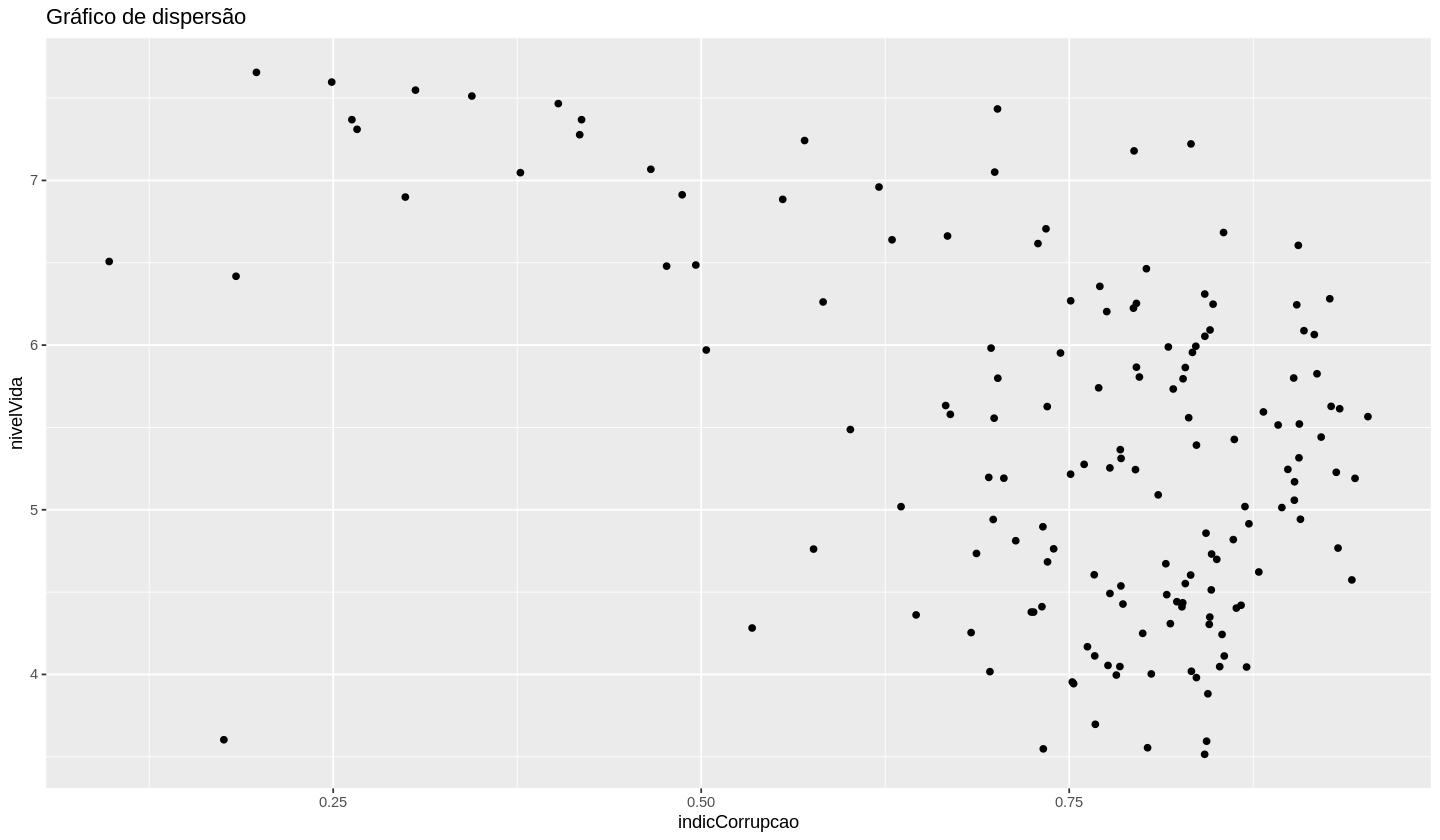

In [ ]:
scatterPlot(xAxis = 'indicCorrupcao', yAxis = 'nivelVida')

Contudo, outra conclusão pode ser considera, se for ponderada a classificação do país de acordo com seu PIB *per capta*. Vejamos.

Visualizando dispersão dos dados

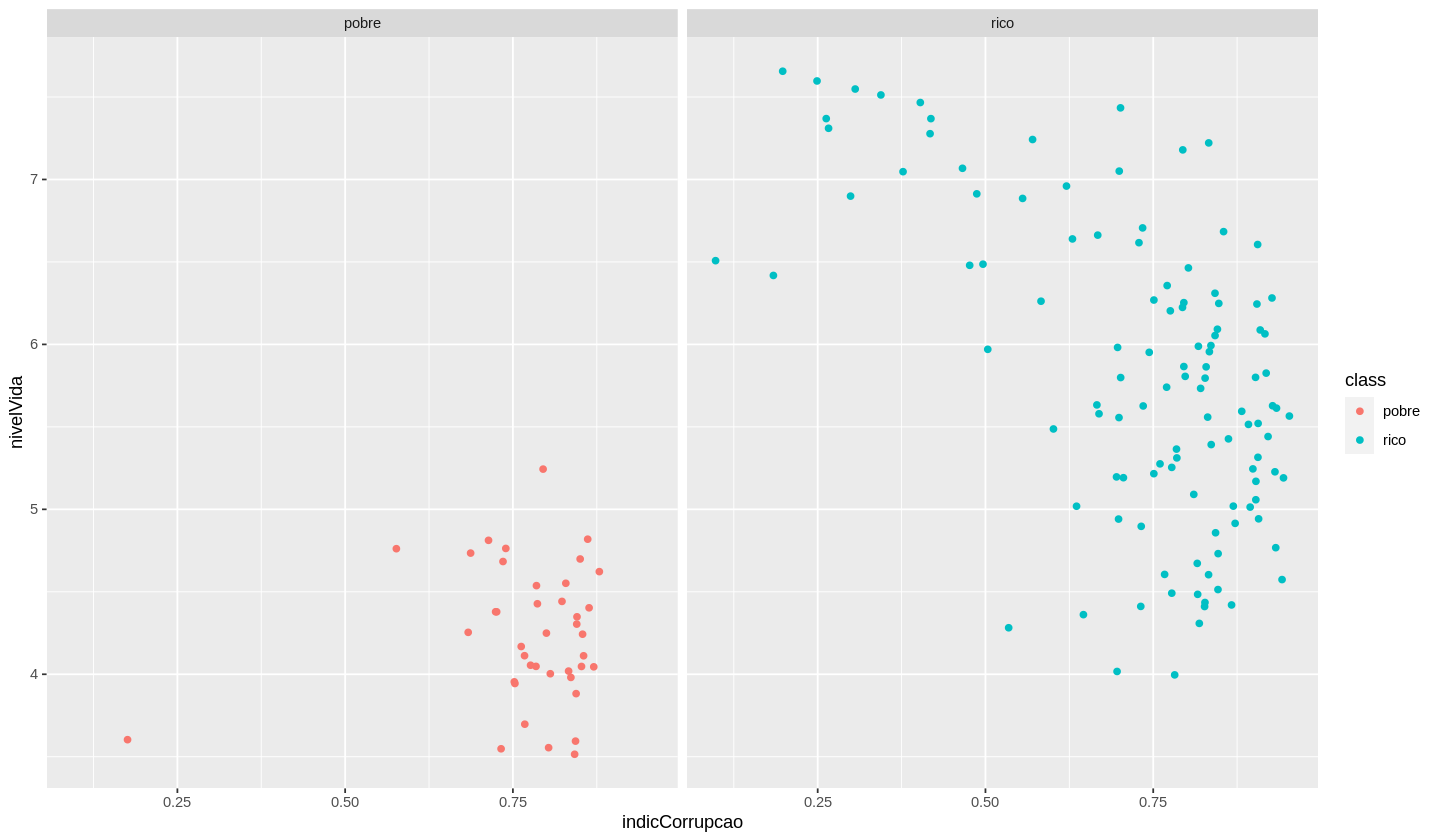

In [ ]:
ggplot(data = dados_, mapping = aes(x = indicCorrupcao, y=nivelVida, col = class)) +

  geom_point() +

  facet_grid(. ~class)

Verificando a existência de dois grupos, vamos calcular a correlação em cada um deles.

In [ ]:
# Correlação
message("Em países pobres não. A matriz de correlação acima demonstra não haver correlação (",
round(cor(pobre$nivelVida, pobre$indicCorrupcao, method = 'spearman'), 2), ") entre estas duas variáveis. \n
Mas, em países ricos, ela é negativa média (",
round(cor(rico$nivelVida, rico$indicCorrupcao, method = 'spearman'), 2), ")")

Em países pobres não. A matriz de correlação acima demonstra não haver correlação (-0.06) entre estas duas variáveis. 

Mas, em países ricos, ela é negativa média (-0.44)



Portanto, em países com PIB *per capta* mais elevado, os efeitos da corrupção tendem a ser mais perceptíveis pela população.

Pergunta 3: O aumento na escala de vida tem algum efeito na média de felicidade entre o público em geral?Qual a correlação entre essas duas variáveis?

In [ ]:
# Medindo correlação
message("Sim. A matriz de correlação acima demonstra haver correlação positiva média (",
round(cor(dados_$nivelVida, dados_$emocoesPositivas, method = 'spearman'), 2), ") entre estas duas variáveis.")


Sim. A matriz de correlação acima demonstra haver correlação positiva média (0.57) entre estas duas variáveis.



Visualizando a interação das variáveis

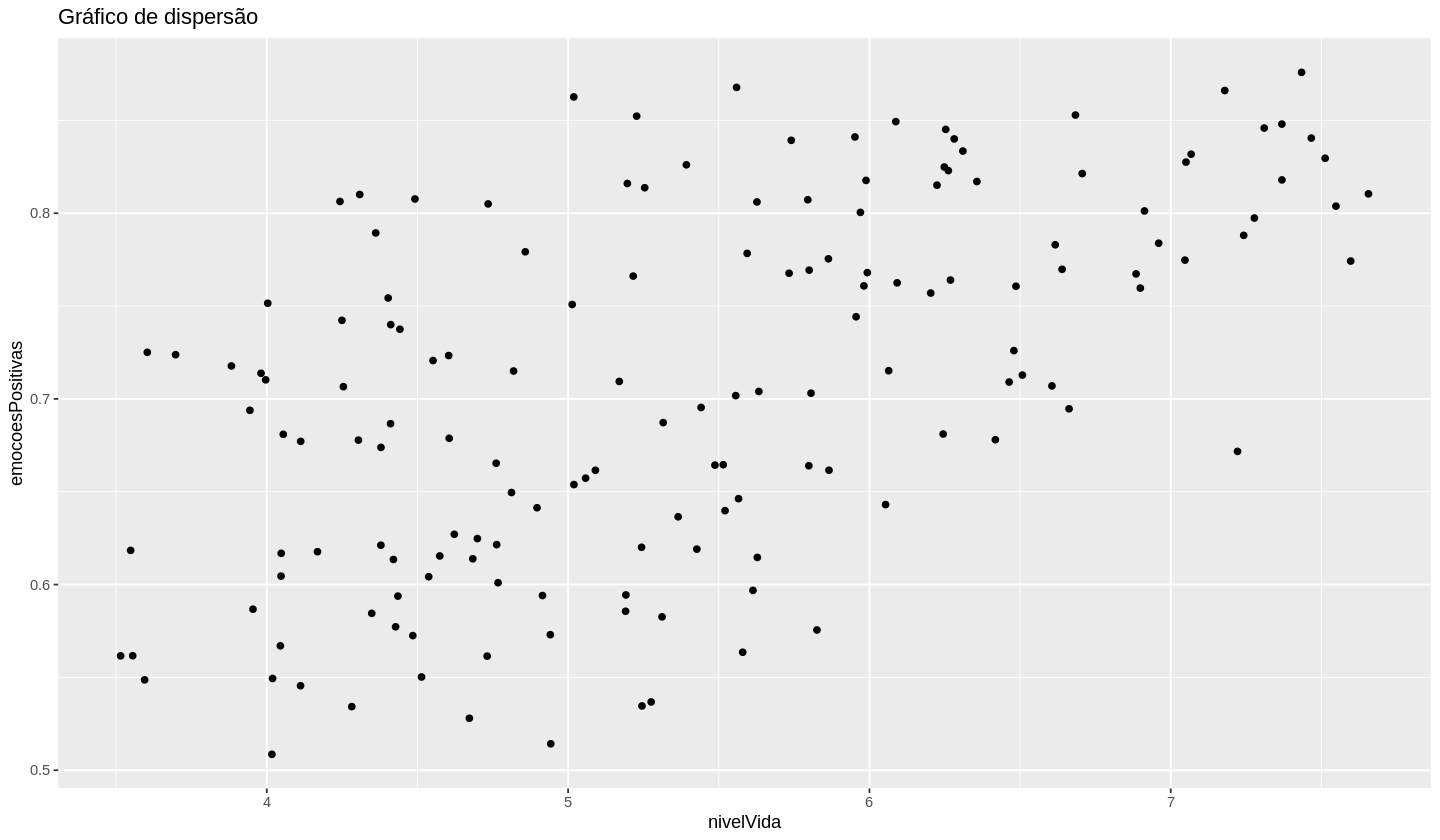

In [ ]:
scatterPlot(xAxis = 'nivelVida', yAxis = 'emocoesPositivas')

Portanto, em certa medida, o nível de vida pode causar boas emoções.

Pergunta 4: O país com o menor índice de suporte social tem maior percepção de corrupção em relação às empresas e ao governo no país?



In [ ]:
# Encontrado país com menor índice de suporte social

message("O país com menor índice de suporte social é: ",
dados_[dados_$supSocial == min(dados_$supSocial), 'nomePais'], " e é classificado como: ",
dados_[dados_$supSocial == min(dados_$supSocial), 'class'], ".")

O país com menor índice de suporte social é: Central African Republic e é classificado como: pobre.



In [ ]:
# Encontrando país com meior percepção de corrupção

message("O país com manior índice de percepção de corrupção é: ",
dados_[dados_$indicCorrupcao == max(dados_$indicCorrupcao),'nomePais'], " e é classificado como: ",
dados_[dados_$indicCorrupcao == max(dados_$indicCorrupcao), 'class'], ".")


O país com manior índice de percepção de corrupção é: Romania e é classificado como: rico.



Portanto, o país com menor suporte social não é o que, ao mesmo tempo, tem maior percepção de corrupção pela população. Na verdade, conforme já informado acima, em países ricos corrupção tende a ser mais percetível pela população. É o que se conclui da visualização da matriz de correlação dos países ricos.

Pergunta 5: Pessoas generosas são mais felizes?

In [ ]:
# Calculando correlação

message("Sim. Mas, a pesar de positiva, muito fraca (",
round(cor(dados_$indicGenerosidade, dados_$emocoesPositivas, method = 'spearman'), 2), ") entre estas duas variáveis.")


Sim. Mas, a pesar de positiva, muito fraca (0.38) entre estas duas variáveis.



Entretanto, ao se analisar os mesmos dados, levando em consideração a classificação do PIB *per capta* em "pobre"/"rico", percebeu-se possível encontrar um padrão diferente.

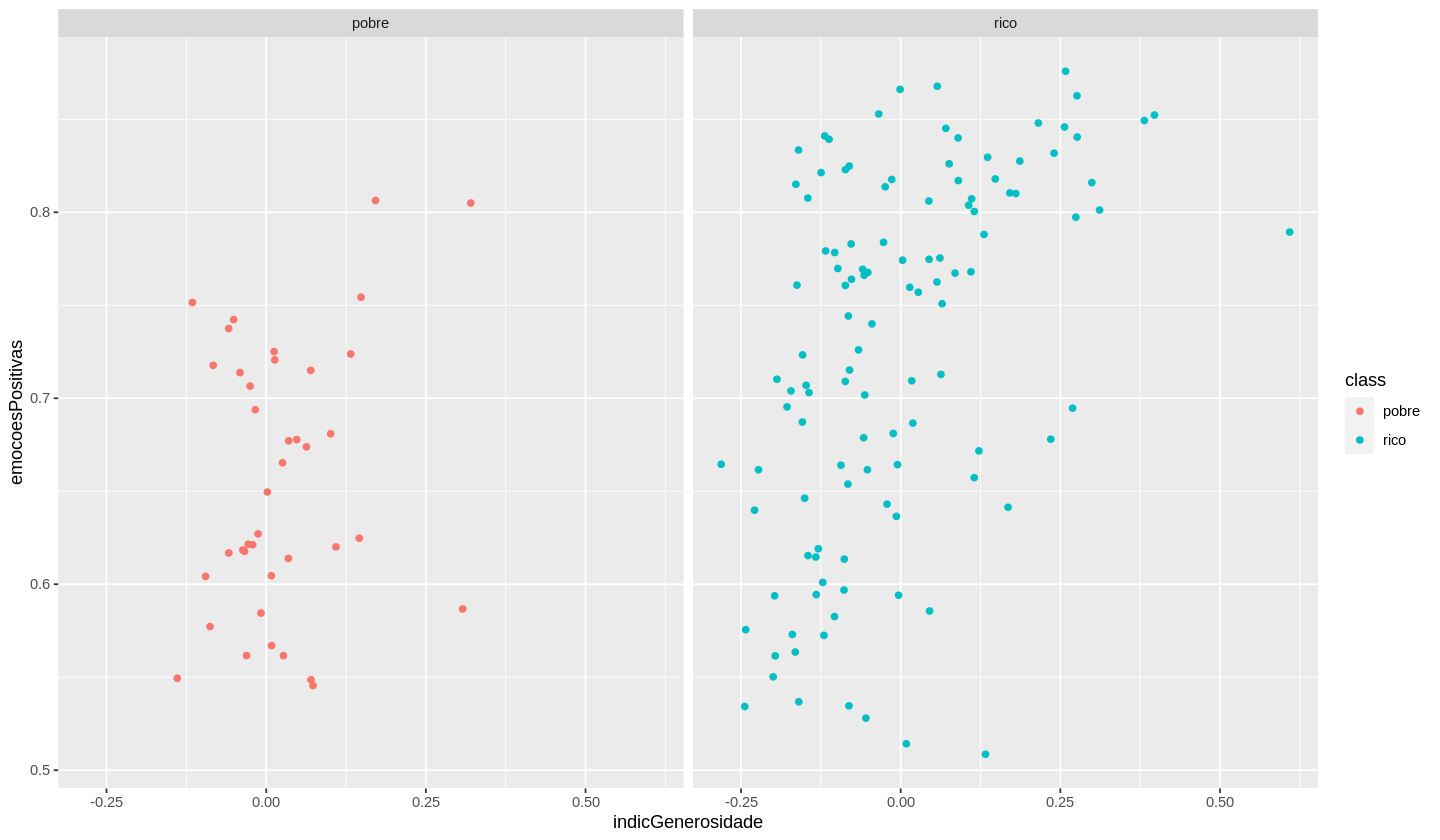

In [ ]:
ggplot(data = dados_, mapping = aes(x = indicGenerosidade, y = emocoesPositivas, col = class)) +

  geom_point() +

    facet_grid(. ~ class)

In [ ]:
message("Em países pobres não. A matriz de correlação acima demonstra não haver correlação (",
round(cor(pobre$indicGenerosidade, pobre$emocoesPositivas, method = 'spearman'), 2), ") entre estas duas variáveis. \n
Mas, em países ricos, ela é positiva média (",
round(cor(rico$indicGenerosidade, rico$emocoesPositivas, method = 'spearman'), 2), ")")

Em países pobres não. A matriz de correlação acima demonstra não haver correlação (0.14) entre estas duas variáveis. 

Mas, em países ricos, ela é positiva média (0.51)



Assim, em países considerados ricos, a felicidade está mais associada à generosidade, do que em países com menor PIB.